<a href="https://colab.research.google.com/github/Code-of-Asura-King/ML-College-Assignment-/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing modules

In [1]:
!pip install ucimlrepo numpy pandas matplotlib scikit-learn

# **Defining Classifiers**

## **1. SVC Classifier**

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)

def svc_linear_kernel(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5]):
    """
    SVC with linear kernel and fixed hyperparameters.
    """
    accuracies = []

    for test_size in test_sizes:
        print(f"Running SVC with linear kernel and test size {test_size}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=40)

        # SVC classifier with the linear kernel
        svc = SVC(kernel='linear', C=1, probability=True)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)

        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        # Store the accuracy for plotting
        accuracies.append(accuracy)

        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print("----------------------------------------------------------------------------------------------")

        # Heatmap of Confusion Matrix
        print("Plotting confusion matrix...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.title(f'Confusion Matrix for Linear Kernel (Test Size {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        plt.close()

         # --- ROC Curve and AUC Calculation ---
        # Flatten Y if it's a DataFrame
        # This is important for scikit-learn functions that expect 1D arrays
        if isinstance(Y, np.ndarray):
            y_flat = Y
        else:
            y_flat = Y.values.flatten()

        class_labels = np.unique(y_flat)
        # Get the probability scores for ROC curve plotting
        Y_pred_proba = svc.predict_proba(X_test)

        # Binarize the labels for multi-class ROC plotting
        Y_bin = label_binarize(y_flat, classes=class_labels)
        n_classes = Y_bin.shape[1]

        # Binarize the true labels for this split
        Y_test_bin = label_binarize(Y_test.values.flatten(), classes=class_labels)
        print("Plotting ROC-AUC...")

        # Create a new plot for each test size
        plt.figure()

        for i in range(n_classes):
            # Calculate ROC curve and AUC for each class (One-vs-Rest)
            fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
            roc_auc = roc_auc_score(Y_test_bin[:, i], Y_pred_proba[:, i])
            plt.plot(
                fpr, tpr,
                label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc:.2f})',
            )

        # Plot the "No skill" line
        plt.plot([0, 1], [0, 1], "k--", label="No skill (AUC = 0.50)")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Multi-class ROC Curve for Test Size: {test_size}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print("--------------------------------------------------")

    # Accuracy bar graph
    print("Plotting accuracy bar graph...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy for Linear Kernel Across Different Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.show()
    print("=========================================================================================")


In [3]:
def svc_poly_kernel(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5]):
    """
    SVC with polynomial kernel and fixed hyperparameters.
    """
    accuracies = []

    for test_size in test_sizes:
        print(f"Running SVC with polynomial kernel and test size {test_size}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=40)

        # SVC classifier with the polynomial kernel
        svc = SVC(kernel='poly', C=1, degree=3, gamma='scale', probability=True)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)

        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        # Store the accuracy for plotting
        accuracies.append(accuracy)

        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print("----------------------------------------------------------------------------------------------")

        # Heatmap of Confusion Matrix
        print("Plotting confusion matrix...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.title(f'Confusion Matrix for Polynomial Kernel (Test Size {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        plt.close()

         # --- ROC Curve and AUC Calculation ---
        # Flatten Y if it's a DataFrame
        # This is important for scikit-learn functions that expect 1D arrays
        if isinstance(Y, np.ndarray):
            y_flat = Y
        else:
            y_flat = Y.values.flatten()

        class_labels = np.unique(y_flat)
        # Get the probability scores for ROC curve plotting
        Y_pred_proba = svc.predict_proba(X_test)

        # Binarize the labels for multi-class ROC plotting
        Y_bin = label_binarize(y_flat, classes=class_labels)
        n_classes = Y_bin.shape[1]

        # Binarize the true labels for this split
        Y_test_bin = label_binarize(Y_test.values.flatten(), classes=class_labels)
        print("Plotting ROC-AUC...")

        # Create a new plot for each test size
        plt.figure()

        for i in range(n_classes):
            # Calculate ROC curve and AUC for each class (One-vs-Rest)
            fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
            roc_auc = roc_auc_score(Y_test_bin[:, i], Y_pred_proba[:, i])
            plt.plot(
                fpr, tpr,
                label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc:.2f})',
            )

        # Plot the "No skill" line
        plt.plot([0, 1], [0, 1], "k--", label="No skill (AUC = 0.50)")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Multi-class ROC Curve for Test Size: {test_size}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print("--------------------------------------------------")

    # Accuracy bar graph
    print("Plotting accuracy bar graph...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy for Polynomial Kernel Across Different Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.show()
    print("=========================================================================================")


In [4]:
def svc_rbf_kernel(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5]):
    """
    SVC with RBF kernel and fixed hyperparameters.
    """
    accuracies = []

    for test_size in test_sizes:
        print(f"Running SVC with RBF kernel and test size {test_size}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=40)

        # SVC classifier with the RBF kernel
        svc = SVC(kernel='rbf', C=10, gamma=0.001,probability=True)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)

        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        # Store the accuracy for plotting
        accuracies.append(accuracy)

        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print("----------------------------------------------------------------------------------------------")

        # Heatmap of Confusion Matrix
        print("Plotting confusion matrix...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.title(f'Confusion Matrix for RBF Kernel (Test Size {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        plt.close()

         # --- ROC Curve and AUC Calculation ---
        # Flatten Y if it's a DataFrame
        # This is important for scikit-learn functions that expect 1D arrays
        if isinstance(Y, np.ndarray):
            y_flat = Y
        else:
            y_flat = Y.values.flatten()

        class_labels = np.unique(y_flat)
        # Get the probability scores for ROC curve plotting
        Y_pred_proba = svc.predict_proba(X_test)

        # Binarize the labels for multi-class ROC plotting
        Y_bin = label_binarize(y_flat, classes=class_labels)
        n_classes = Y_bin.shape[1]

        # Binarize the true labels for this split
        Y_test_bin = label_binarize(Y_test.values.flatten(), classes=class_labels)
        print("Plotting ROC-AUC...")

        # Create a new plot for each test size
        plt.figure()

        for i in range(n_classes):
            # Calculate ROC curve and AUC for each class (One-vs-Rest)
            fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
            roc_auc = roc_auc_score(Y_test_bin[:, i], Y_pred_proba[:, i])
            plt.plot(
                fpr, tpr,
                label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc:.2f})',
            )

        # Plot the "No skill" line
        plt.plot([0, 1], [0, 1], "k--", label="No skill (AUC = 0.50)")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Multi-class ROC Curve for Test Size: {test_size}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print("--------------------------------------------------")

    # Accuracy bar graph
    print("Plotting accuracy bar graph...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy for RBF Kernel Across Different Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.show()
    print("=========================================================================================")


In [5]:
def svc_sigmoid_kernel(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5]):
    """
    SVC with Sigmoid kernel and fixed hyperparameters.
    """
    accuracies = []

    for test_size in test_sizes:
        print(f"Running SVC with sigmoid kernel and test size {test_size}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=40)

        # SVC classifier with the sigmoid kernel
        svc = SVC(kernel='sigmoid', C=10, gamma='auto', probability=True)
        svc.fit(X_train, Y_train)
        Y_pred = svc.predict(X_test)

        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        # Store the accuracy for plotting
        accuracies.append(accuracy)

        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{class_report}")
        print("----------------------------------------------------------------------------------------------")

        # Heatmap of Confusion Matrix
        print("Plotting confusion matrix...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.title(f'Confusion Matrix for Sigmoid Kernel (Test Size {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        plt.close()

         # --- ROC Curve and AUC Calculation ---
        # Flatten Y if it's a DataFrame
        # This is important for scikit-learn functions that expect 1D arrays
        if isinstance(Y, np.ndarray):
            y_flat = Y
        else:
            y_flat = Y.values.flatten()

        class_labels = np.unique(y_flat)
        # Get the probability scores for ROC curve plotting
        Y_pred_proba = svc.predict_proba(X_test)

        # Binarize the labels for multi-class ROC plotting
        Y_bin = label_binarize(y_flat, classes=class_labels)
        n_classes = Y_bin.shape[1]

        # Binarize the true labels for this split
        Y_test_bin = label_binarize(Y_test.values.flatten(), classes=class_labels)
        print("Plotting ROC-AUC...")

        # Create a new plot for each test size
        plt.figure()

        for i in range(n_classes):
            # Calculate ROC curve and AUC for each class (One-vs-Rest)
            fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
            roc_auc = roc_auc_score(Y_test_bin[:, i], Y_pred_proba[:, i])
            plt.plot(
                fpr, tpr,
                label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc:.2f})',
            )

        # Plot the "No skill" line
        plt.plot([0, 1], [0, 1], "k--", label="No skill (AUC = 0.50)")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Multi-class ROC Curve for Test Size: {test_size}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print("--------------------------------------------------")

    # Accuracy bar graph
    print("Plotting accuracy bar graph...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy for Sigmoid Kernel Across Different Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.show()
    print("=========================================================================================")


## 2. MLP CLassifier

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)


def mlp_classifier(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5],
                   momentum=0.95, max_iter=1000, learning_rate='adaptive'):
    """
    MLP classifier testing across different train-test splits.
    Includes momentum, learning rate, and epoch size (max_iter).
    Plots accuracy bar graph, confusion matrices, and ROC curves.
    """

    results = {}
    accuracies = []

    class_labels = Y['class'].unique()

    for test_size in test_sizes:
        print(f"\nRunning MLPClassifier with Test Size {test_size}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=test_size, random_state=42
        )

        # MLP classifier
        mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),
                            momentum=momentum,
                            solver='adam',
                            learning_rate=learning_rate,
                            max_iter=max_iter,
                            random_state=2)

        mlp.fit(X_train, Y_train)
        Y_pred = mlp.predict(X_test)

        # Evaluate
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        results[test_size] = {
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': class_report,
            'Y_test': Y_test,
            'Y_pred': Y_pred
        }

        accuracies.append(accuracy)

        print("Accuracy:", accuracy)
        print("Classification Report:\n", class_report)

        # --- Confusion Matrix ---
        print("Plotting Confusion Matrix...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f'Confusion Matrix (Test Size {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

         # --- ROC Curve and AUC Calculation ---
        # Flatten Y if it's a DataFrame
        # This is important for scikit-learn functions that expect 1D arrays
        if isinstance(Y, np.ndarray):
            y_flat = Y
        else:
            y_flat = Y.values.flatten()

        class_labels = np.unique(y_flat)
        # Get the probability scores for ROC curve plotting
        Y_pred_proba = mlp.predict_proba(X_test)

        # Binarize the labels for multi-class ROC plotting
        Y_bin = label_binarize(y_flat, classes=class_labels)
        n_classes = Y_bin.shape[1]

        # Binarize the true labels for this split
        Y_test_bin = label_binarize(Y_test.values.flatten(), classes=class_labels)
        print("Plotting ROC-AUC...")

        # Create a new plot for each test size
        plt.figure()

        for i in range(n_classes):
            # Calculate ROC curve and AUC for each class (One-vs-Rest)
            fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
            roc_auc = roc_auc_score(Y_test_bin[:, i], Y_pred_proba[:, i])
            plt.plot(
                fpr, tpr,
                label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc:.2f})',
            )

        # Plot the "No skill" line
        plt.plot([0, 1], [0, 1], "k--", label="No skill (AUC = 0.50)")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Multi-class ROC Curve for Test Size: {test_size}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print("--------------------------------------------------")

    # --- Accuracy Bar Graph Across Test Sizes ---
    print("\nPlotting Accuracy Bar Graph Across All Test Sizes...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy of MLPClassifier Across Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()




## 3. Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier

def random_forest_classifier(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5], n_estimators=100, max_depth=5, random_state=2):
    """
    Random Forest classifier tested across different train-test splits.
    Includes ROC-AUC, confusion matrix plots, and accuracy bar chart.
    """
    results = {}
    accuracies = []

    class_labels = Y['class'].unique()

    for test_size in test_sizes:
        print(f"\nRunning RandomForestClassifier with Test Size {test_size}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=test_size, random_state=random_state,stratify=Y
        )

        # Initialize and train Random Forest
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=random_state
        )
        rf.fit(X_train, Y_train)
        Y_pred = rf.predict(X_test)



        # Accuracy and Evaluation
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        results[test_size] = {
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': class_report,
            'Y_test': Y_test,
            'Y_pred': Y_pred
        }

        accuracies.append(accuracy)

        print("Accuracy:", accuracy)
        print("Classification Report:\n", class_report)

        # Confusion Matrix Heatmap
        print("Plotting Confusion Matrix...")
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f'Confusion Matrix (Test Size {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

        # --- ROC Curve and AUC Calculation ---
        # Flatten Y if it's a DataFrame
        # This is important for scikit-learn functions that expect 1D arrays
        if isinstance(Y, np.ndarray):
            y_flat = Y
        else:
            y_flat = Y.values.flatten()

        class_labels = np.unique(y_flat)
        # Get the probability scores for ROC curve plotting
        Y_pred_proba = rf.predict_proba(X_test)

        # Binarize the labels for multi-class ROC plotting
        Y_bin = label_binarize(y_flat, classes=class_labels)
        n_classes = Y_bin.shape[1]

        # Binarize the true labels for this split
        Y_test_bin = label_binarize(Y_test.values.flatten(), classes=class_labels)
        print("Plotting ROC-AUC...")

        # Create a new plot for each test size
        plt.figure()

        for i in range(n_classes):
            # Calculate ROC curve and AUC for each class (One-vs-Rest)
            fpr, tpr, _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
            roc_auc = roc_auc_score(Y_test_bin[:, i], Y_pred_proba[:, i])
            plt.plot(
                fpr, tpr,
                label=f'ROC curve for class {class_labels[i]} (AUC = {roc_auc:.2f})',
            )

        # Plot the "No skill" line
        plt.plot([0, 1], [0, 1], "k--", label="No skill (AUC = 0.50)")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Multi-class ROC Curve for Test Size: {test_size}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print("--------------------------------------------------")

    # Accuracy Bar Graph
    print("\nPlotting Accuracy Bar Graph Across All Test Sizes...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy of Random Forest Across Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()




## 4. SVC Classifier with PCA

In [8]:
def svc_classifier_with_pca(X, Y, kernels=['linear', 'poly', 'rbf', 'sigmoid'], test_sizes=[0.2, 0.3, 0.4, 0.5]):
    """
    SVC classifier with various kernels, testing across different train-test splits.
    Applies PCA for dimensionality reduction to 2 components.
    """

    results = {}


    for kernel in kernels:
        accuracies = []
        for test_size in test_sizes:
            print(f"Running SVC with kernel '{kernel}' and test size {test_size}...")

            # Split the data
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=40)

            # Apply PCA
            pca = PCA(n_components=5)
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)

            # Train SVC on PCA data
            svc = SVC(kernel=kernel, C=1, probability=True)
            svc.fit(X_train_pca, Y_train)
            Y_pred = svc.predict(X_test_pca)
            class_names = Y['class'].unique()

            # Accuracy and metrics
            accuracy = accuracy_score(Y_test, Y_pred)
            cm = confusion_matrix(Y_test, Y_pred)
            class_report = classification_report(Y_test, Y_pred)

            results[(kernel, test_size)] = {
                'accuracy': accuracy,
                'confusion_matrix': cm,
                'classification_report': class_report
            }

            accuracies.append(accuracy)

            print("=========================================================================================")
            print("running for pca")
            print(f"Kernel: {kernel}, Test Size: {test_size}")
            print(f"Accuracy: {accuracy}")
            print(f"Classification Report:\n{class_report}")
            print("----------------------------------------------------------------------------------------------")


        # Accuracy bar plot for all test sizes
        print("\nAccuracy bargraph for different testSizes \n")
        plt.figure(figsize=(8, 6))
        plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
        plt.title(f'Accuracy for {kernel} Kernel Across Different Test Sizes')
        plt.xlabel('Train-Test Split')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.show()


        print("=========================================================================================")






## 5. MLP Classifier With PCA

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def mlp_classifier_with_pca(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5],
                            momentum=0.9, max_iter=1000, learning_rate='adaptive', n_components=5):
    """
    MLP classifier with PCA for dimensionality reduction.
    Tests across different train-test splits.
    Includes momentum, learning rate, max iterations.
    Plots accuracy, confusion matrices, ROC curves.
    """

    results = {}
    accuracies = []
    class_labels = Y['class'].unique()

    for test_size in test_sizes:
        print(f"\nRunning MLPClassifier with Test Size {test_size} and PCA n_components={n_components}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=test_size, random_state=40, stratify=Y
        )

        # Apply PCA on train and transform test accordingly
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # MLP classifier on PCA features
        mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),
                            momentum=momentum,
                            learning_rate=learning_rate,
                            max_iter=max_iter,
                            random_state=2)

        mlp.fit(X_train_pca, Y_train)
        Y_pred = mlp.predict(X_test_pca)

        # Evaluate
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        results[test_size] = {
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': class_report,
            'Y_test': Y_test,
            'Y_pred': Y_pred
        }

        accuracies.append(accuracy)

        print("Accuracy:", accuracy)
        print("Classification Report:\n", class_report)



    # --- Accuracy Bar Graph Across Test Sizes ---
    print("\nPlotting Accuracy Bar Graph Across All Test Sizes...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy of MLPClassifier with PCA Across Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()




## 6. Random Forest CLassifier with PCA

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def random_forest_classifier_with_pca(X, Y, test_sizes=[0.2, 0.3, 0.4, 0.5], n_estimators=100, max_depth=5, random_state=2, n_components=5):
    """
    Random Forest classifier with PCA for dimensionality reduction.
    Tests across different train-test splits.
    Plots accuracy, confusion matrices, ROC curves.
    """

    results = {}
    accuracies = []
    class_labels = Y['class'].unique()

    for test_size in test_sizes:
        print(f"\nRunning Random ForestClassifier with Test Size {test_size} and PCA n_components={n_components}...")

        # Split the data
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=test_size, random_state=40, stratify=Y
        )

        # Apply PCA on train and transform test accordingly
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

       # Initialize and train Random Forest
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=random_state
        )
        rf.fit(X_train_pca, Y_train)
        Y_pred = rf.predict(X_test_pca)

        # Evaluate
        accuracy = accuracy_score(Y_test, Y_pred)
        cm = confusion_matrix(Y_test, Y_pred)
        class_report = classification_report(Y_test, Y_pred)

        results[test_size] = {
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': class_report,
            'Y_test': Y_test,
            'Y_pred': Y_pred
        }

        accuracies.append(accuracy)

        print("Accuracy:", accuracy)
        print("Classification Report:\n", class_report)



    # --- Accuracy Bar Graph Across Test Sizes ---
    print("\nPlotting Accuracy Bar Graph Across All Test Sizes...")
    plt.figure(figsize=(8, 6))
    plt.bar([f'{int(100*(1-size))}:{int(100*size)}' for size in test_sizes], accuracies, align='center')
    plt.title('Accuracy of RFClassifier with PCA Across Test Sizes')
    plt.xlabel('Train-Test Split')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()




# **Wine Dataset Fetching**

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

In [12]:
import pandas as pd
import numpy as np

# Convert features and targets into DataFrames
wine_features = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
wine_targets = pd.DataFrame(wine.data.targets, columns=wine.data.target_names)

# Optionally, combine features and target into a single DataFrame
wine_dataset = pd.concat([wine_features, wine_targets], axis=1)
wine_dataset.head()

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                          3.92     1065      1  
1                          3.40     1050      1  
2                          3.17     1185      1  
3                          3.45     1480      1  
4                          2.93      735      1

In [13]:
#checking for null value
wine_dataset.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the features and transform
scaled_features = scaler.fit_transform(wine_features)
# Step 3: Convert scaled features back to DataFrame (to preserve column names)
wine_features_scaled = pd.DataFrame(scaled_features, columns=wine_features.columns)





## SVC Classifier

Running SVC with linear kernel and test size 0.2...
Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        11
           3       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


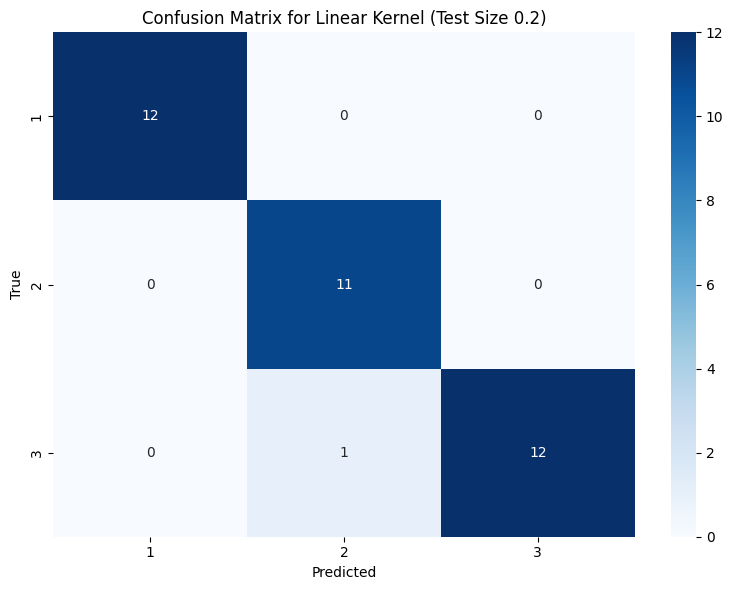

Plotting ROC-AUC...


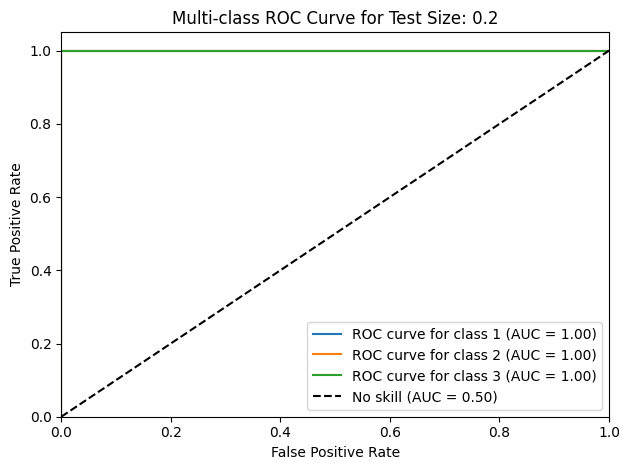

--------------------------------------------------
Running SVC with linear kernel and test size 0.3...
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.95      0.95      0.95        20
           3       1.00      0.95      0.97        19

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


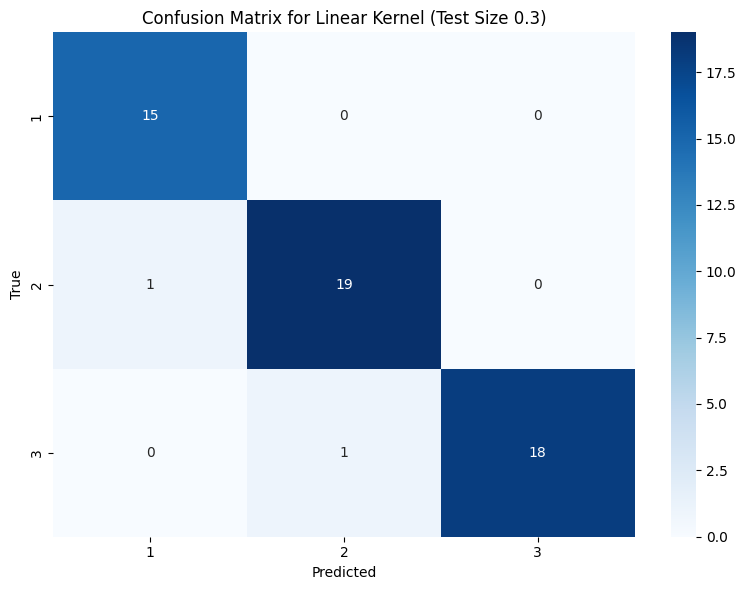

Plotting ROC-AUC...


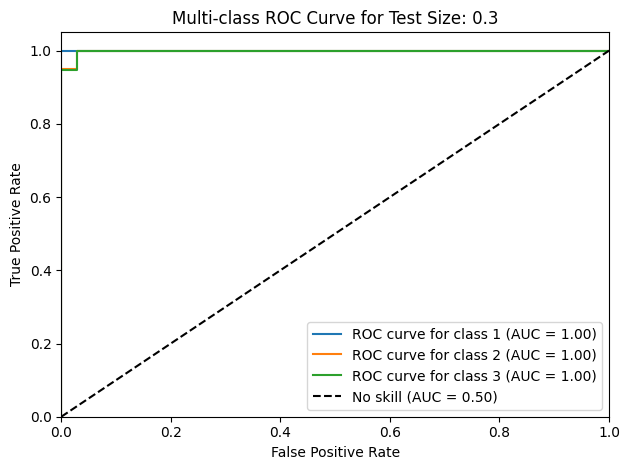

--------------------------------------------------
Running SVC with linear kernel and test size 0.4...
Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       0.97      0.93      0.95        30
           3       1.00      0.95      0.97        19

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


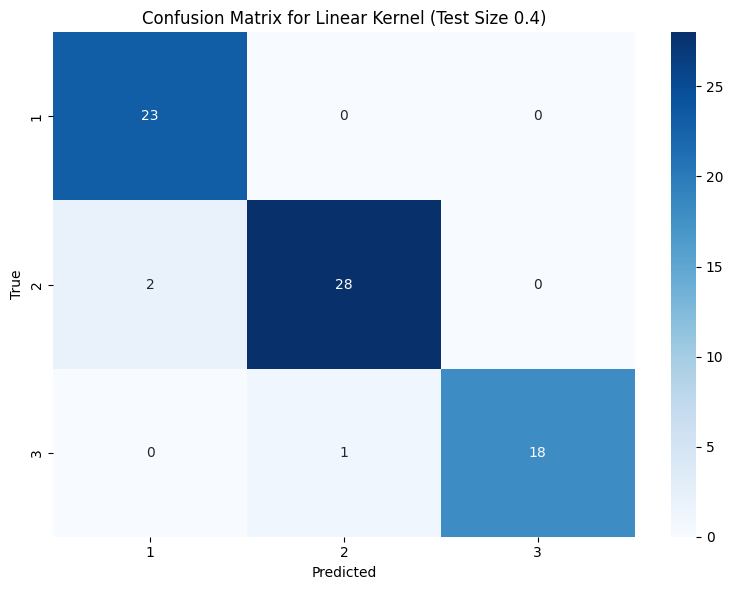

Plotting ROC-AUC...


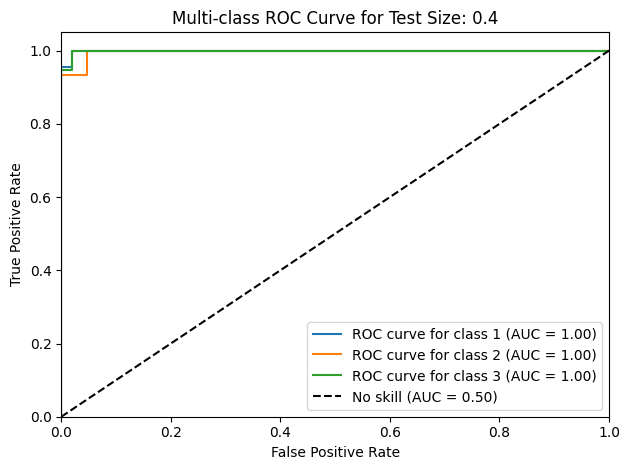

--------------------------------------------------
Running SVC with linear kernel and test size 0.5...
Accuracy: 0.9887640449438202
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.99        36
           3       1.00      0.96      0.98        23

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


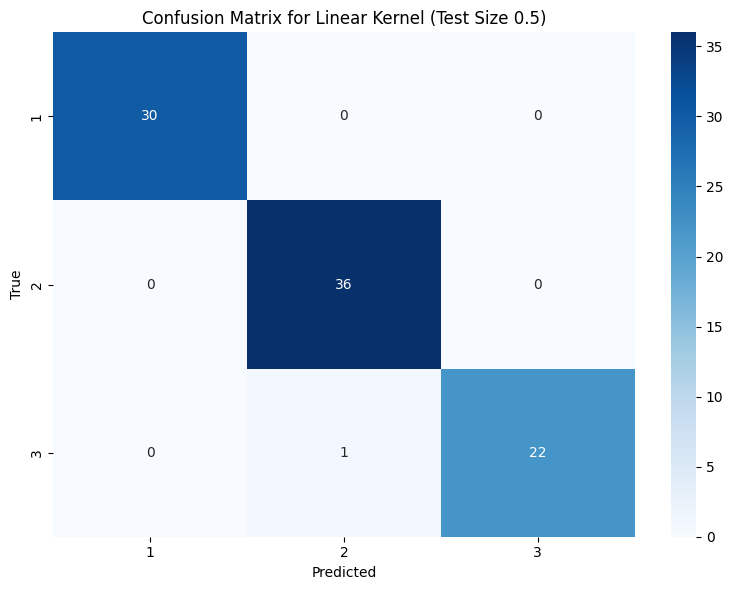

Plotting ROC-AUC...


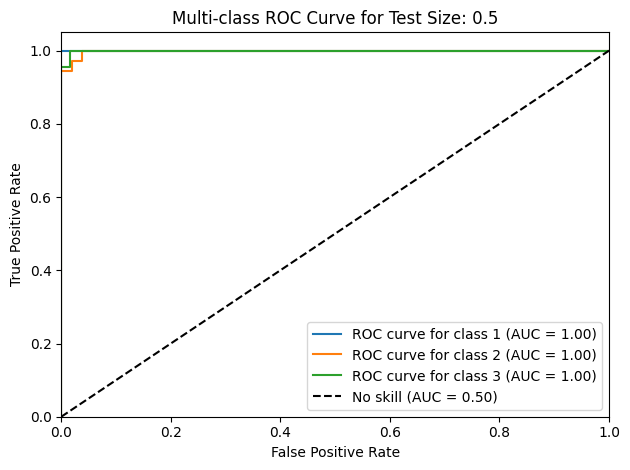

--------------------------------------------------
Plotting accuracy bar graph...


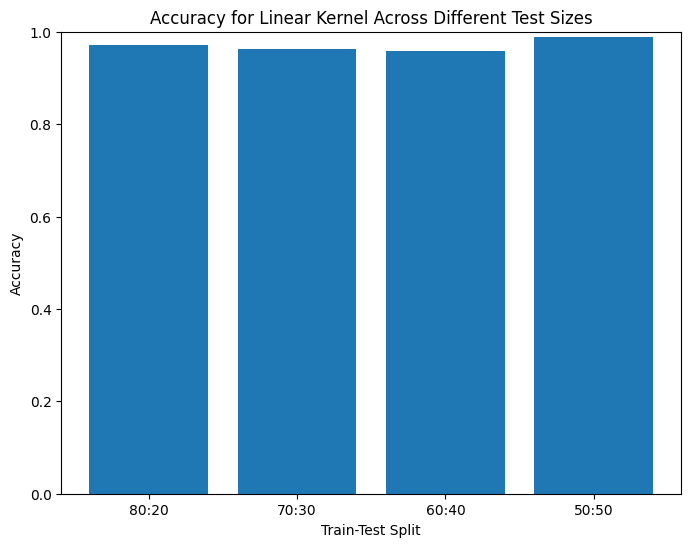

In [15]:

test_sizes = [0.2, 0.3, 0.4, 0.5]
svc_linear_kernel(wine_features_scaled,wine_targets['class'],test_sizes)


Running SVC with polynomial kernel and test size 0.2...
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.85      1.00      0.92        11
           3       1.00      0.92      0.96        13

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.95      0.94      0.95        36

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


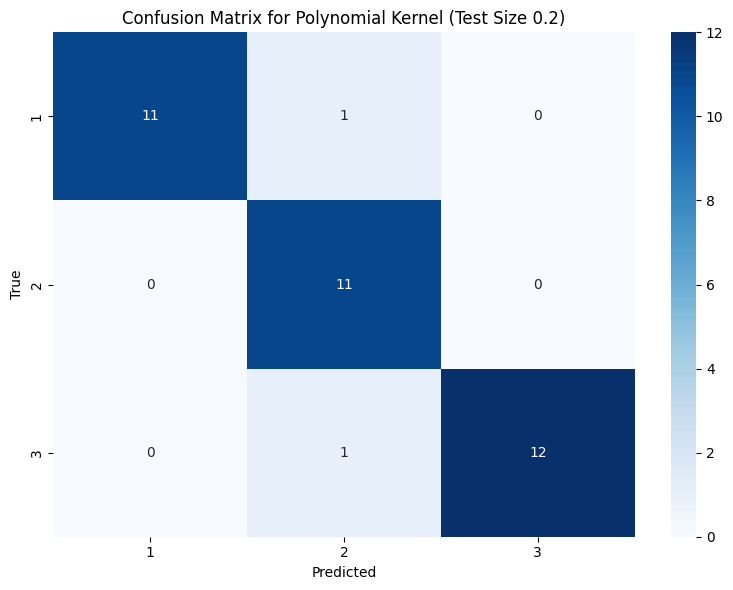

Plotting ROC-AUC...


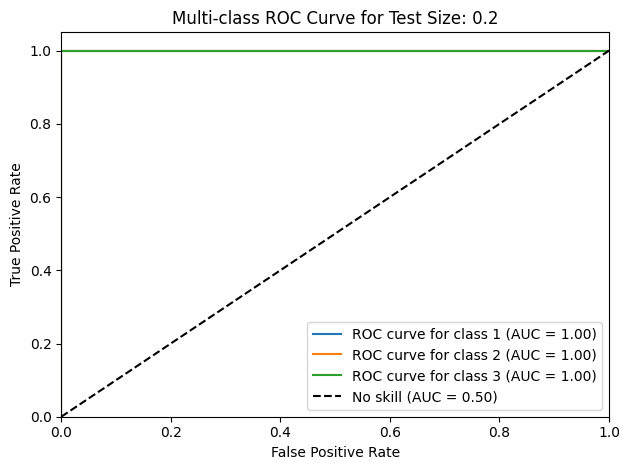

--------------------------------------------------
Running SVC with polynomial kernel and test size 0.3...
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        20
           3       1.00      0.95      0.97        19

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


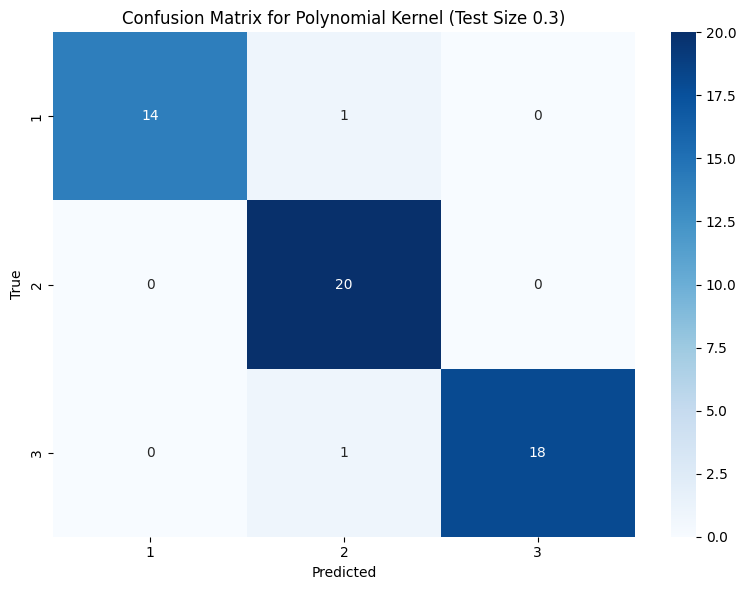

Plotting ROC-AUC...


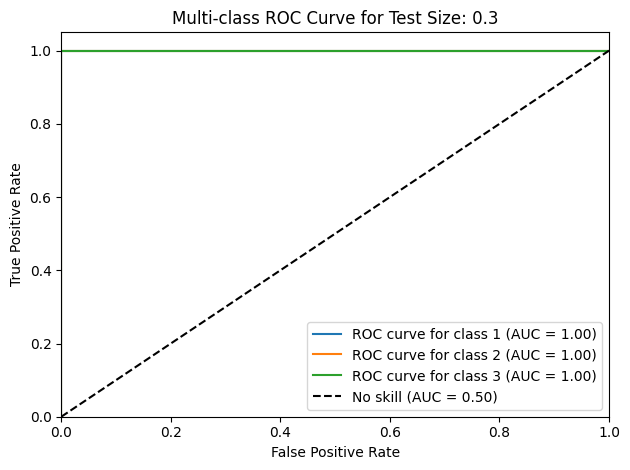

--------------------------------------------------
Running SVC with polynomial kernel and test size 0.4...
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.91      0.97      0.94        30
           3       1.00      0.89      0.94        19

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.95      0.94      0.94        72

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


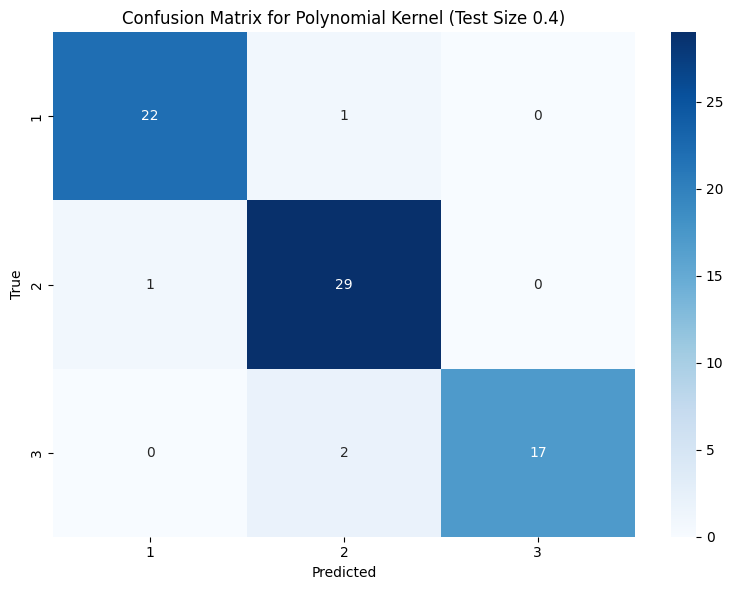

Plotting ROC-AUC...


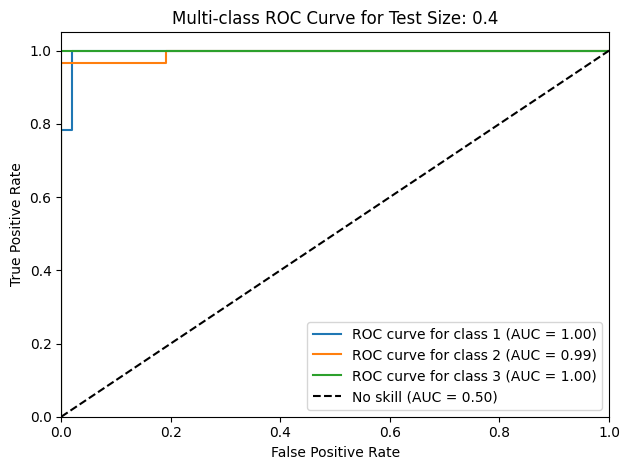

--------------------------------------------------
Running SVC with polynomial kernel and test size 0.5...
Accuracy: 0.9550561797752809
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        30
           2       0.90      1.00      0.95        36
           3       1.00      0.87      0.93        23

    accuracy                           0.96        89
   macro avg       0.97      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


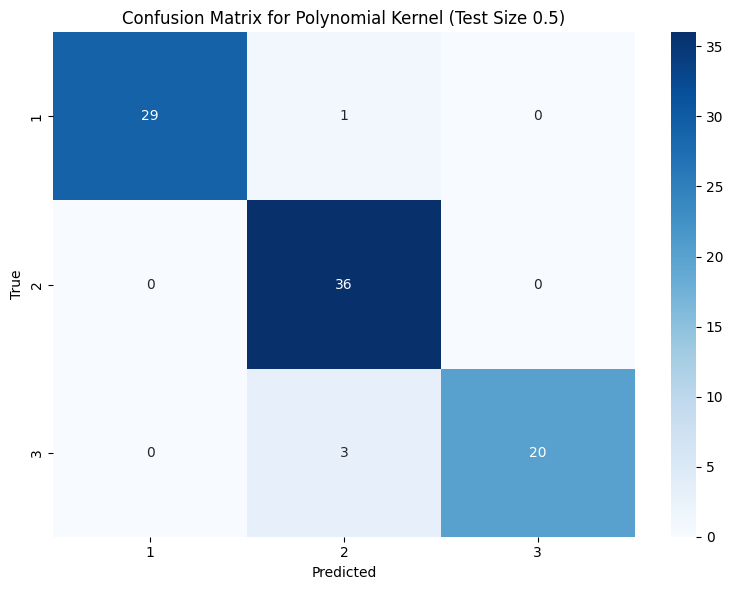

Plotting ROC-AUC...


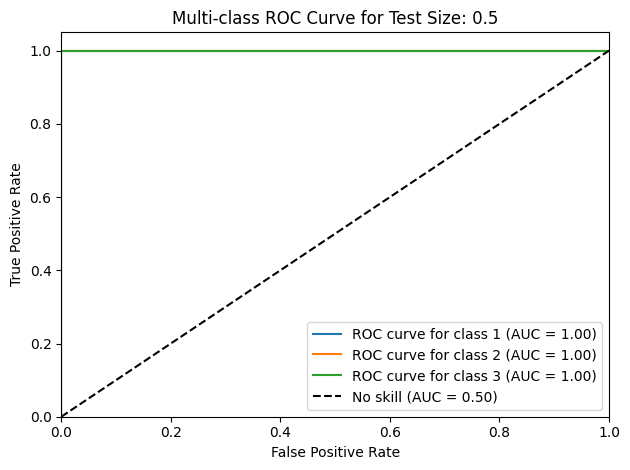

--------------------------------------------------
Plotting accuracy bar graph...


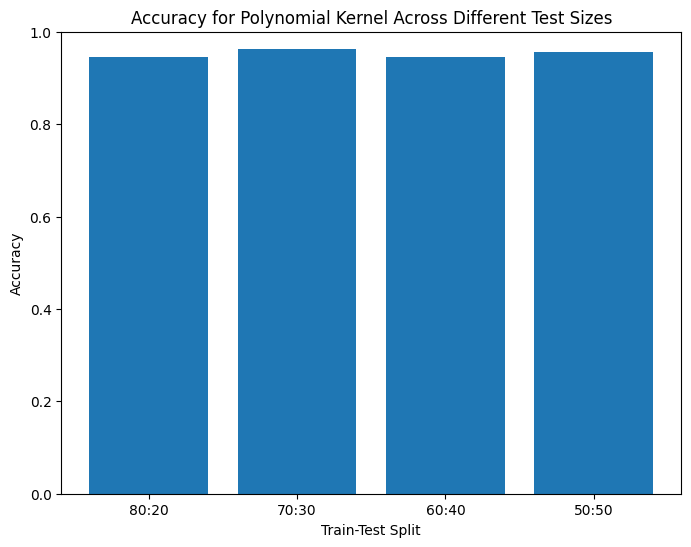

In [16]:
svc_poly_kernel(wine_features_scaled,wine_targets['class'],test_sizes)

Running SVC with RBF kernel and test size 0.2...
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


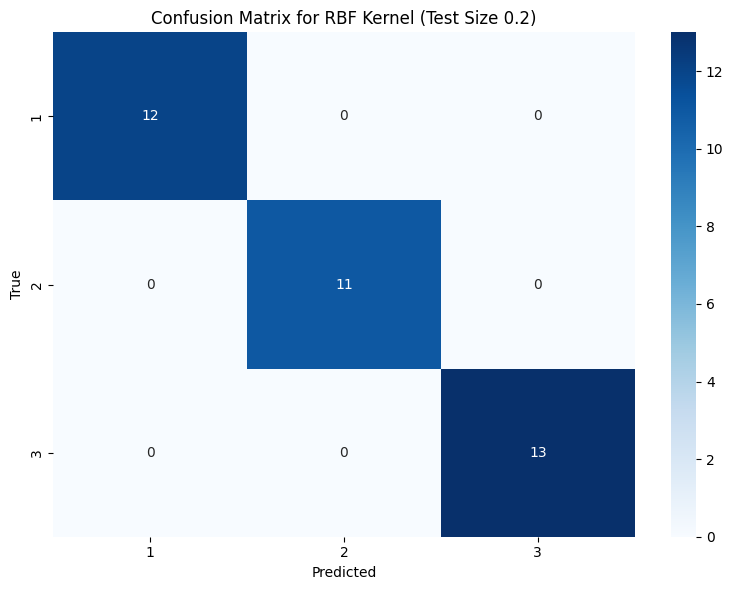

Plotting ROC-AUC...


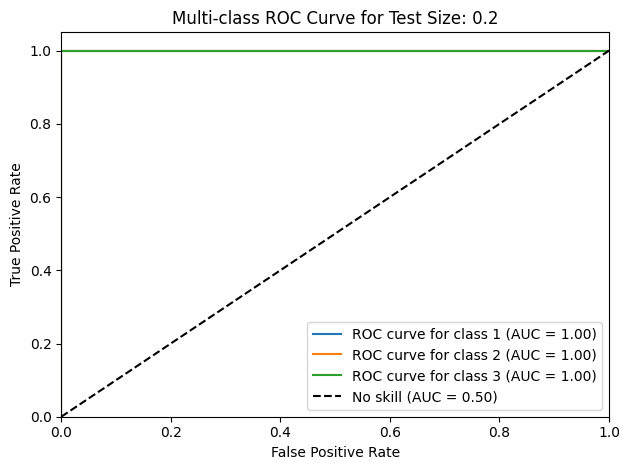

--------------------------------------------------
Running SVC with RBF kernel and test size 0.3...
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        19

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


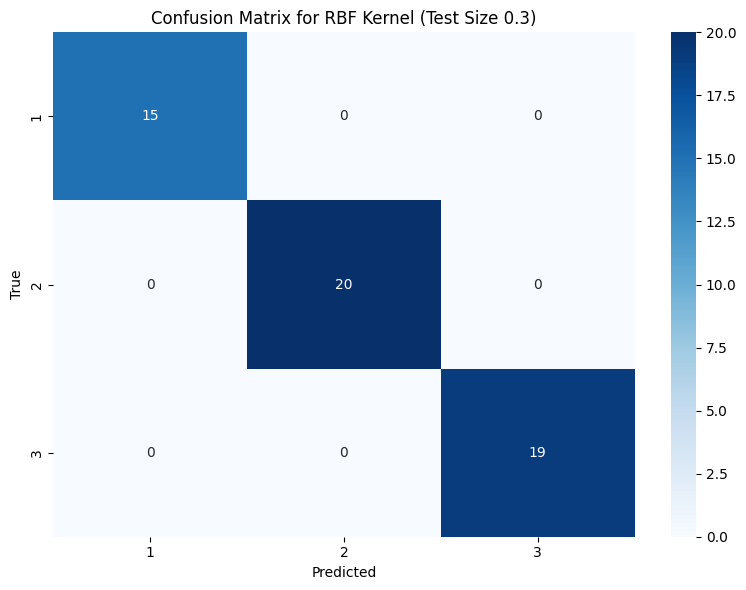

Plotting ROC-AUC...


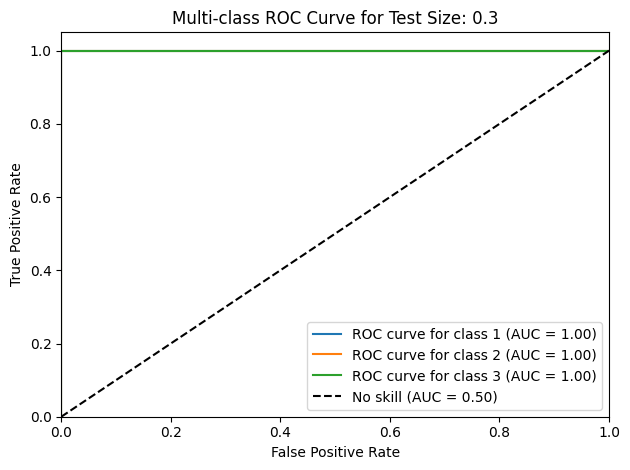

--------------------------------------------------
Running SVC with RBF kernel and test size 0.4...
Accuracy: 0.9861111111111112
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.97      0.98        30
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


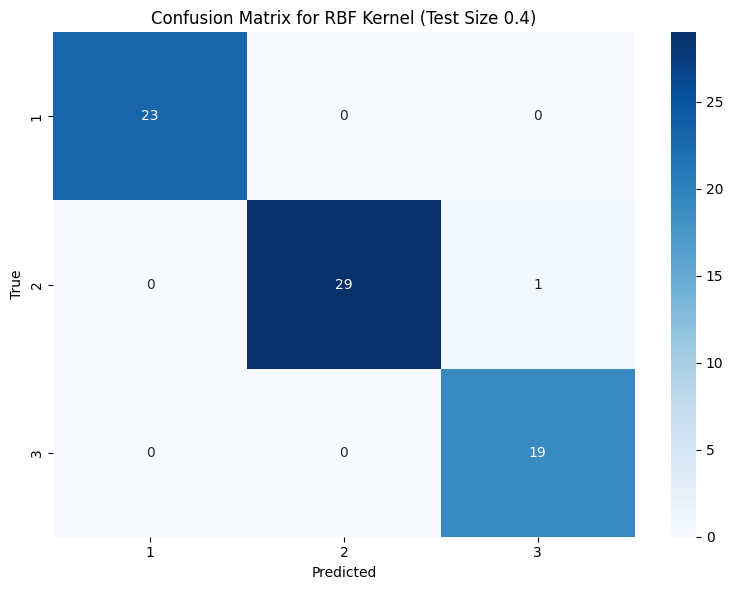

Plotting ROC-AUC...


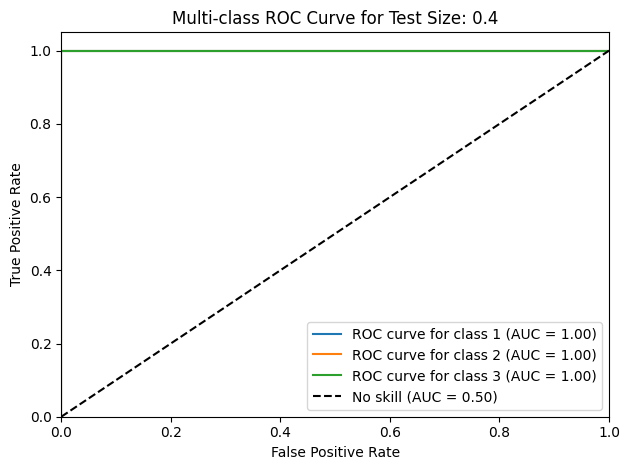

--------------------------------------------------
Running SVC with RBF kernel and test size 0.5...
Accuracy: 0.9887640449438202
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        23

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


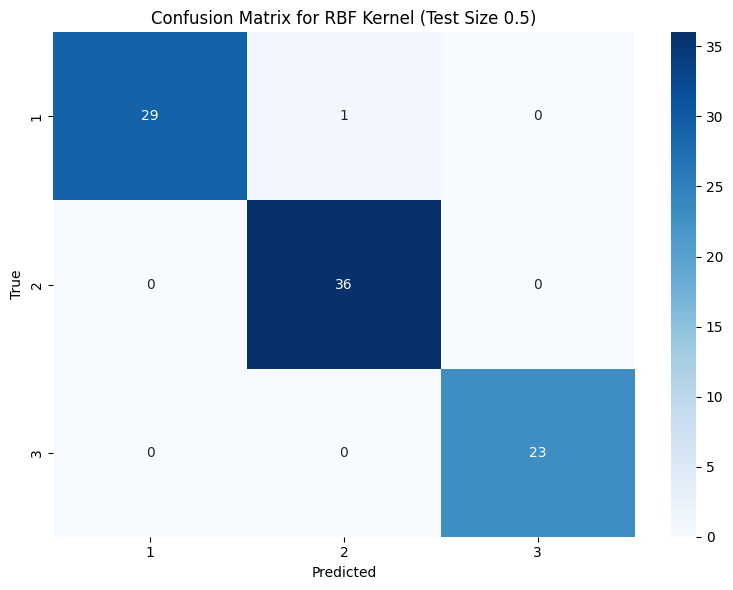

Plotting ROC-AUC...


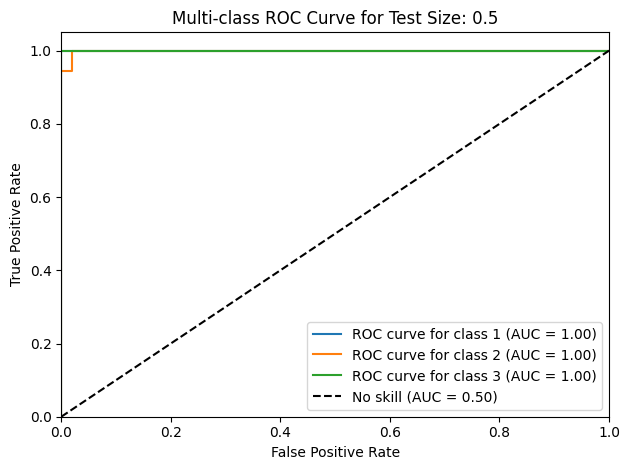

--------------------------------------------------
Plotting accuracy bar graph...


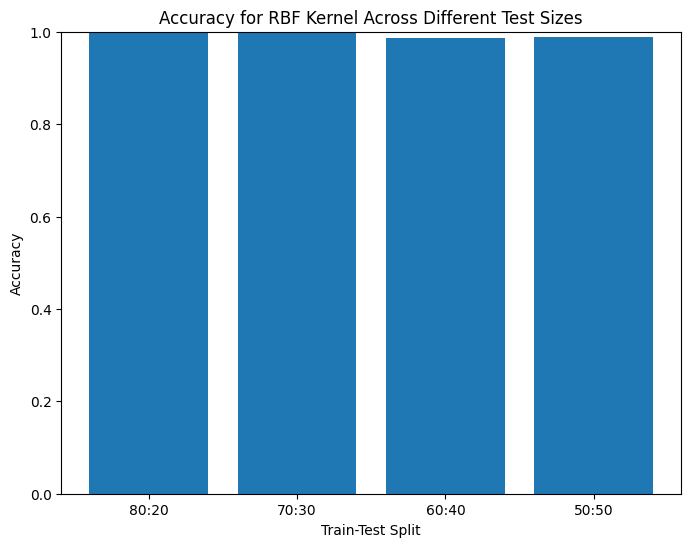

In [17]:
svc_rbf_kernel(wine_features_scaled,wine_targets['class'],test_sizes)

Running SVC with sigmoid kernel and test size 0.2...
Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        11
           3       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


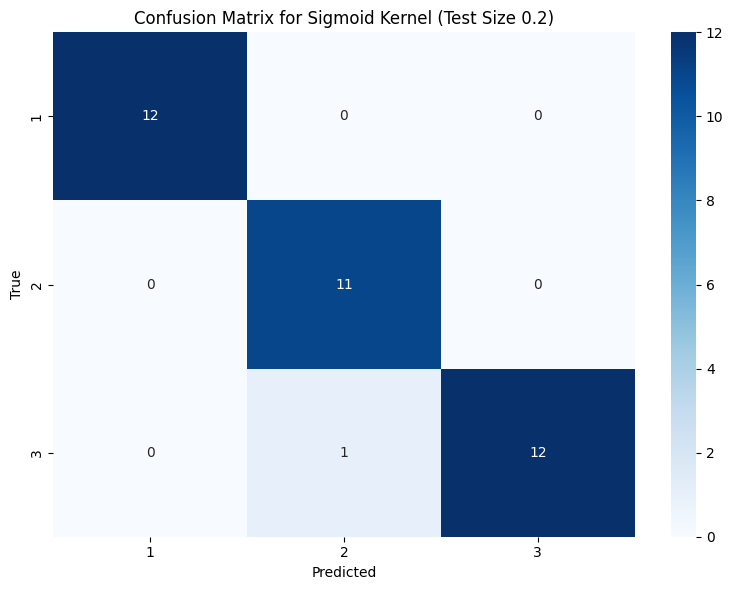

Plotting ROC-AUC...


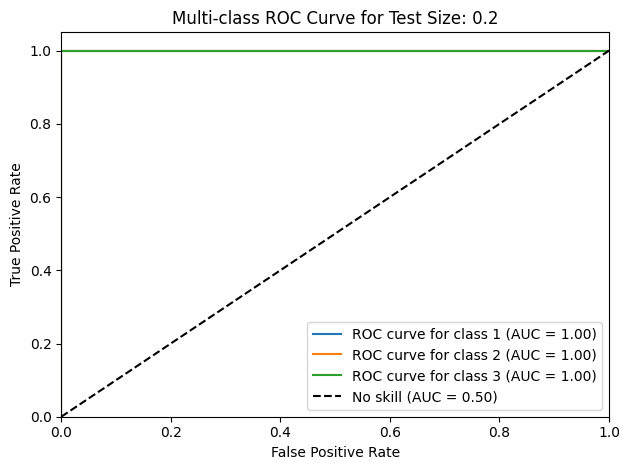

--------------------------------------------------
Running SVC with sigmoid kernel and test size 0.3...
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        20
           3       1.00      0.95      0.97        19

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


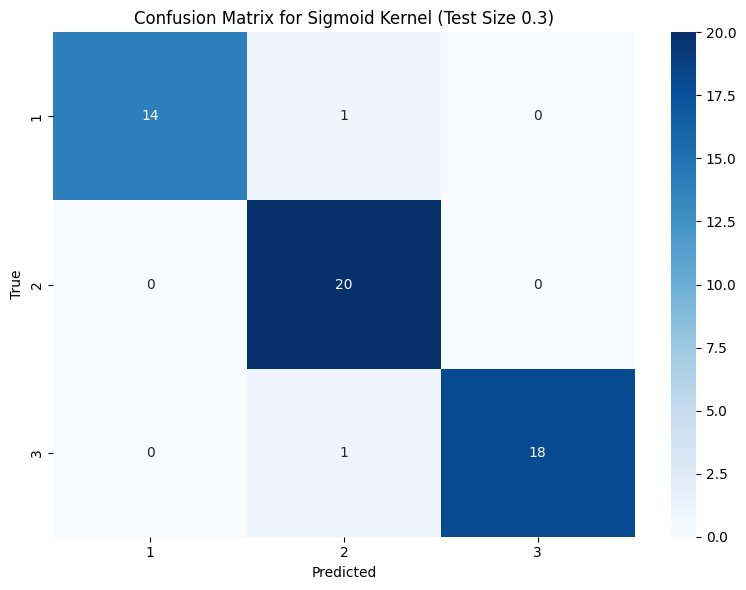

Plotting ROC-AUC...


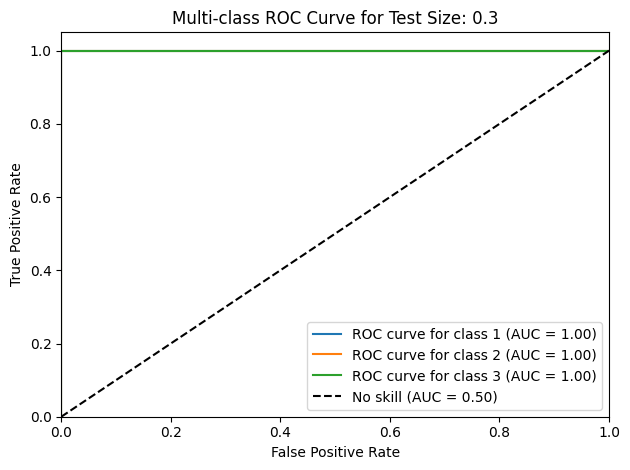

--------------------------------------------------
Running SVC with sigmoid kernel and test size 0.4...
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       0.93      0.93      0.93        30
           3       1.00      0.95      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


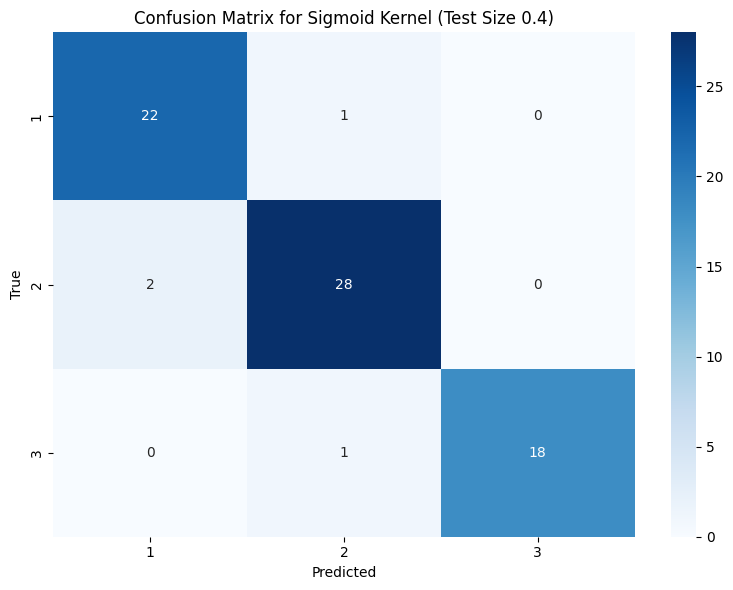

Plotting ROC-AUC...


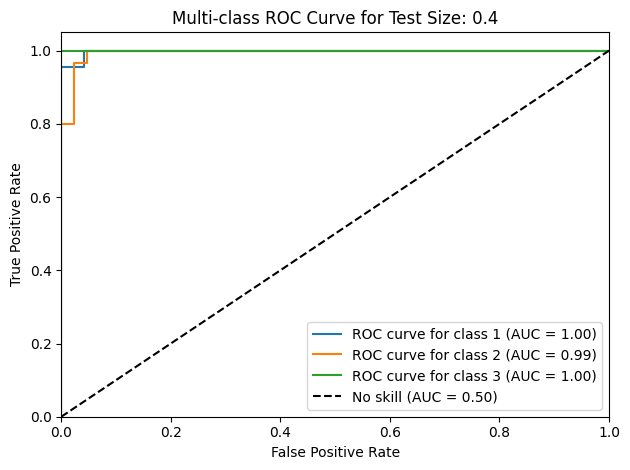

--------------------------------------------------
Running SVC with sigmoid kernel and test size 0.5...
Accuracy: 0.9325842696629213
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.87      0.91        30
           2       0.88      0.97      0.92        36
           3       1.00      0.96      0.98        23

    accuracy                           0.93        89
   macro avg       0.95      0.93      0.94        89
weighted avg       0.94      0.93      0.93        89

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


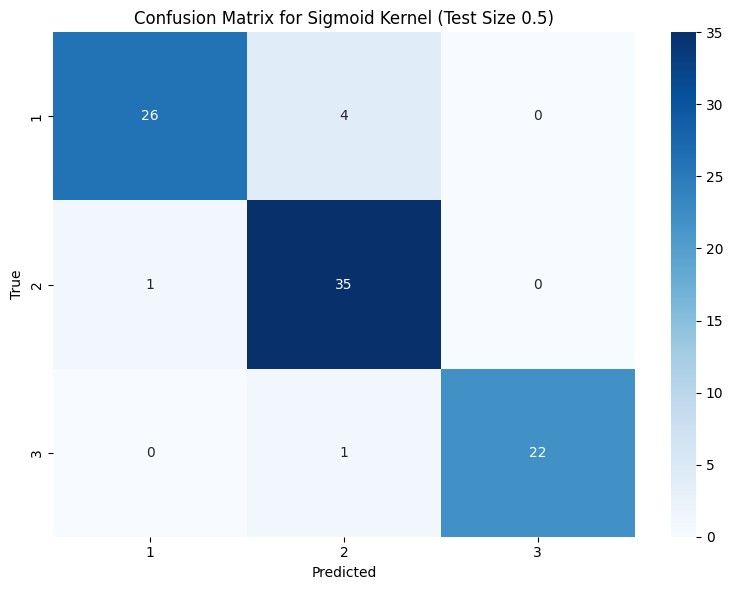

Plotting ROC-AUC...


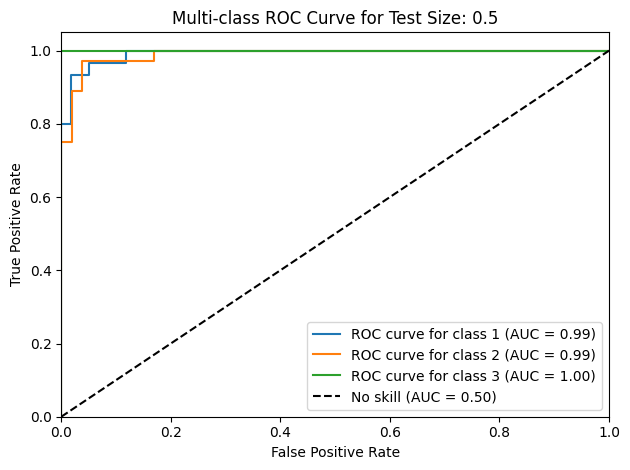

--------------------------------------------------
Plotting accuracy bar graph...


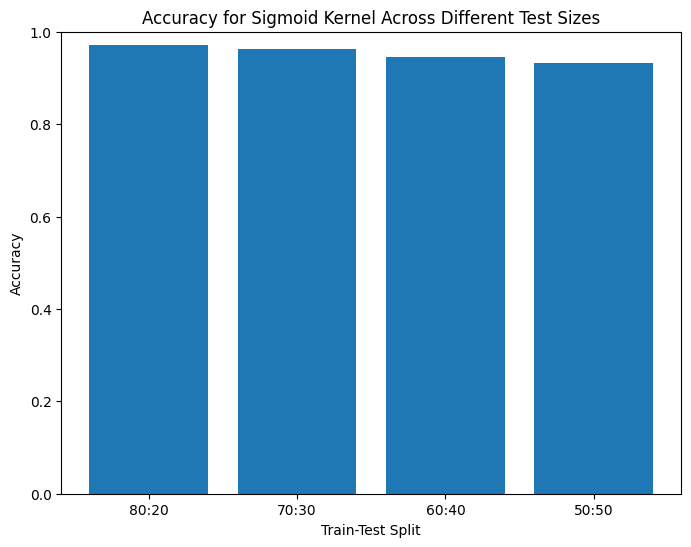

In [18]:
svc_sigmoid_kernel(wine_features_scaled,wine_targets['class'],test_sizes)

## MLP CLassifier


Running MLPClassifier with Test Size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Plotting Confusion Matrix...


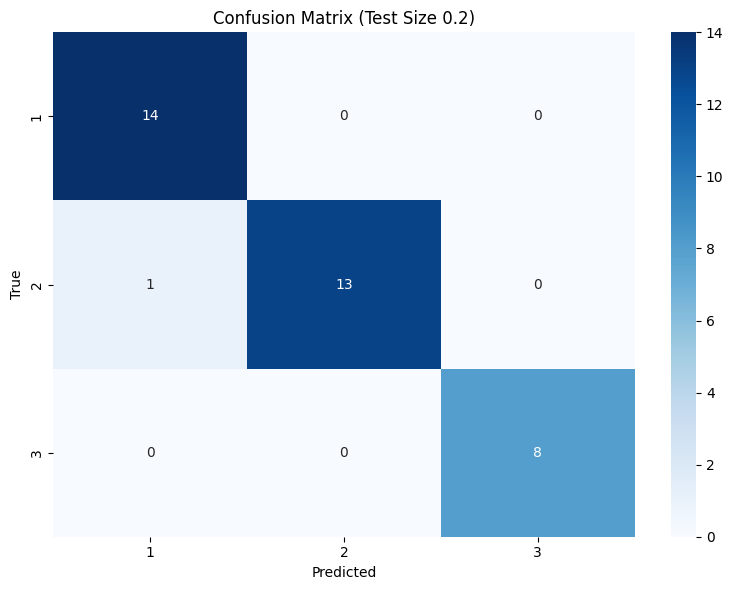

Plotting ROC-AUC...


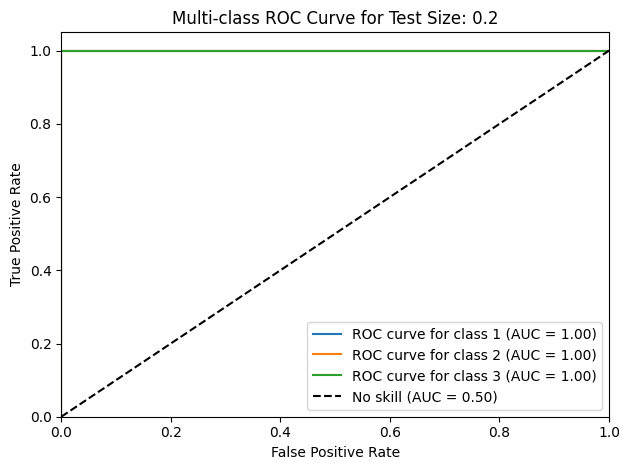

--------------------------------------------------

Running MLPClassifier with Test Size 0.3...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Plotting Confusion Matrix...


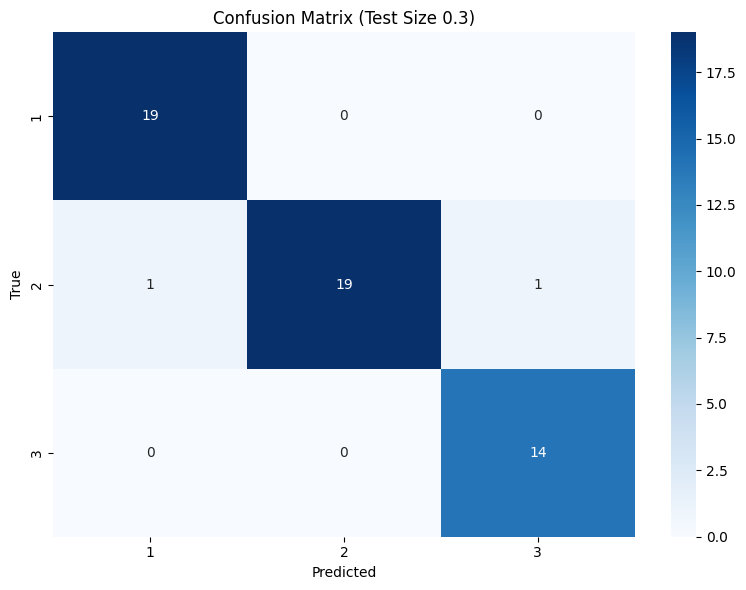

Plotting ROC-AUC...


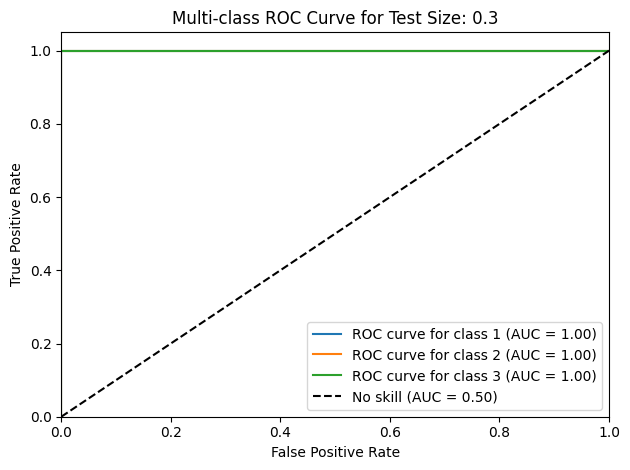

--------------------------------------------------

Running MLPClassifier with Test Size 0.4...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       1.00      0.89      0.94        27
           3       0.95      1.00      0.97        19

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72

Plotting Confusion Matrix...


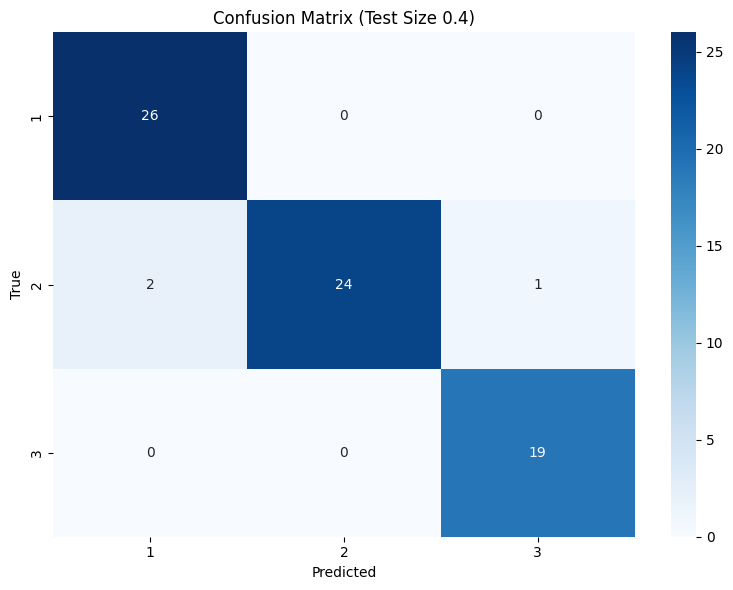

Plotting ROC-AUC...


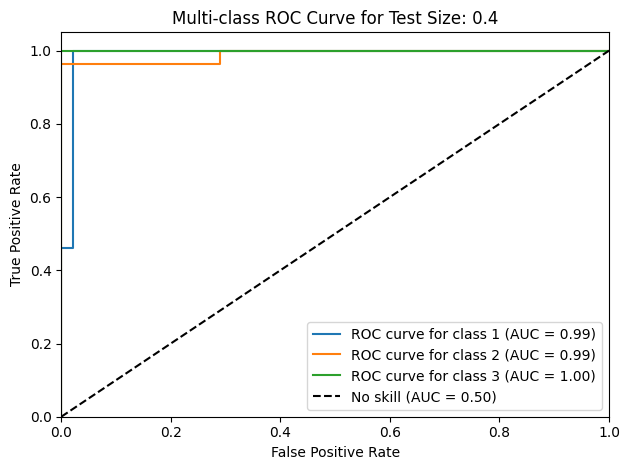

--------------------------------------------------

Running MLPClassifier with Test Size 0.5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9662921348314607
Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        33
           2       1.00      0.91      0.95        34
           3       0.96      1.00      0.98        22

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89

Plotting Confusion Matrix...


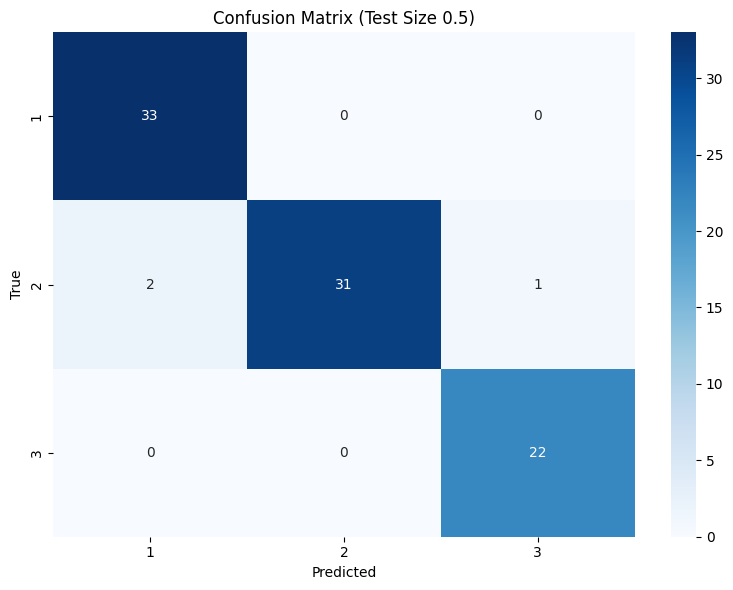

Plotting ROC-AUC...


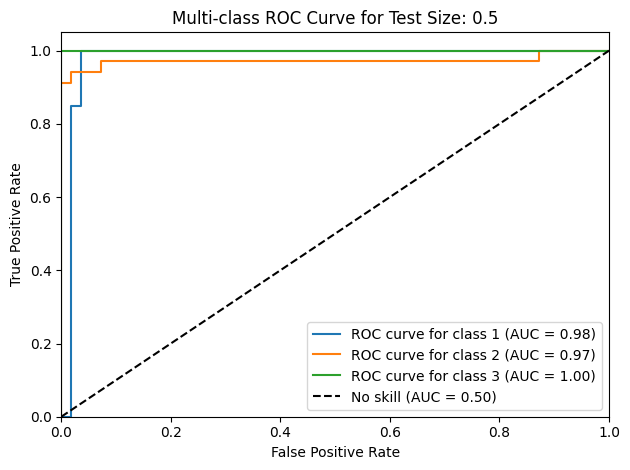

--------------------------------------------------

Plotting Accuracy Bar Graph Across All Test Sizes...


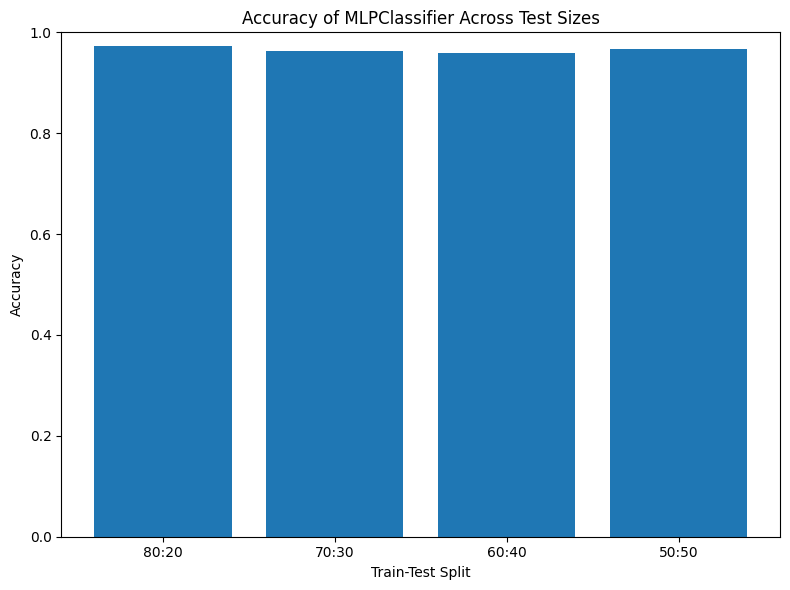

In [19]:

mlp_classifier(
    X=wine_features_scaled,
    Y=wine_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    momentum=0.95,
    max_iter=1000,
    learning_rate='adaptive'
)



## Random Forest Classifier


Running RandomForestClassifier with Test Size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Plotting Confusion Matrix...


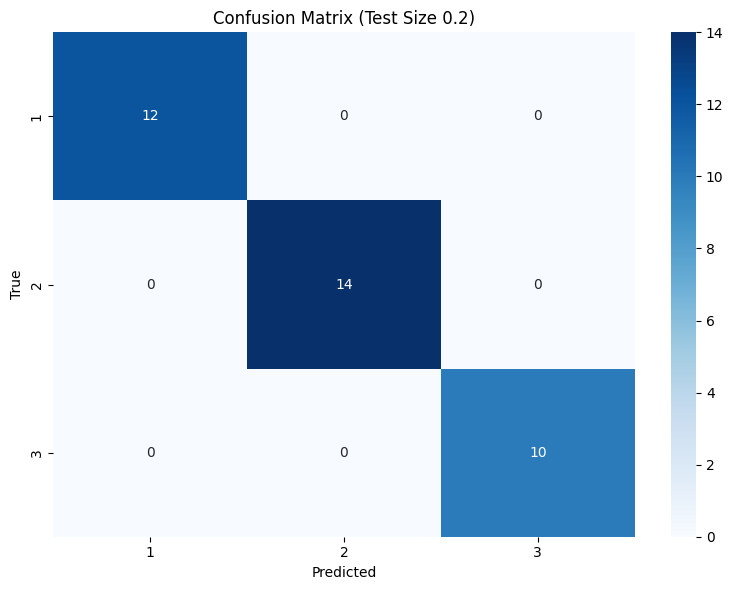

Plotting ROC-AUC...


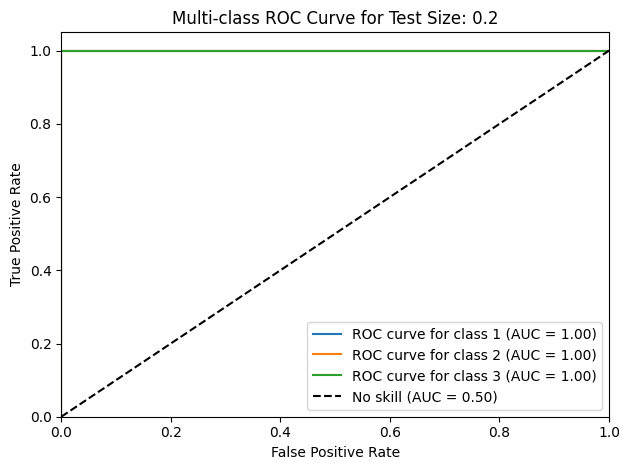

--------------------------------------------------

Running RandomForestClassifier with Test Size 0.3...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Plotting Confusion Matrix...


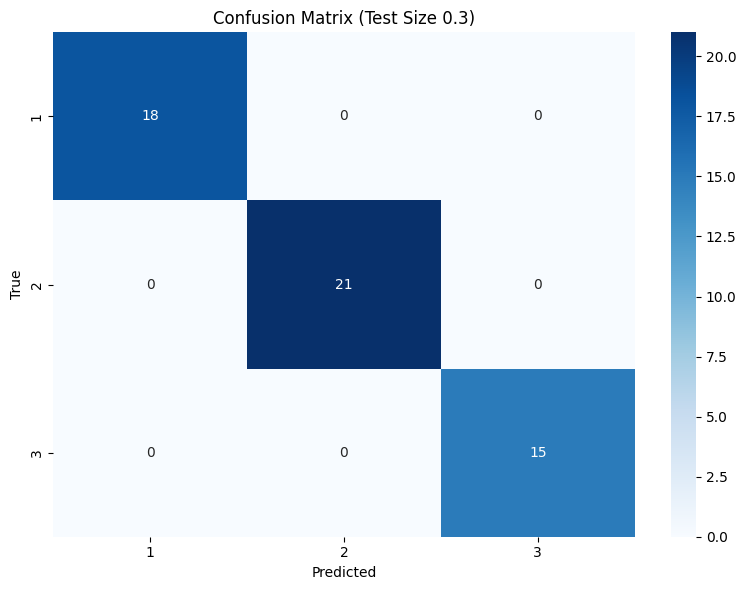

Plotting ROC-AUC...


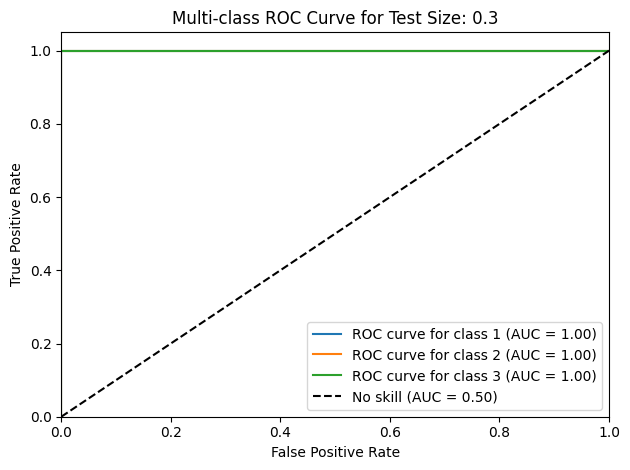

--------------------------------------------------

Running RandomForestClassifier with Test Size 0.4...
Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.97      0.97      0.97        29
           3       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

Plotting Confusion Matrix...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


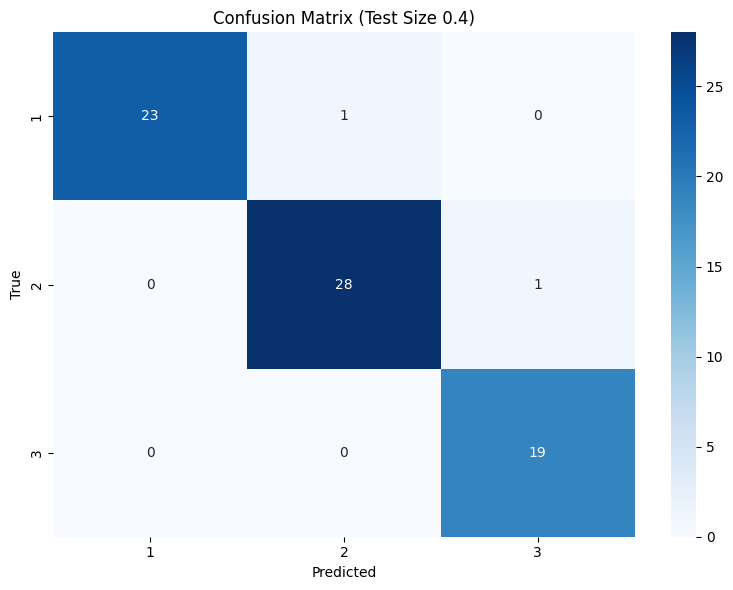

Plotting ROC-AUC...


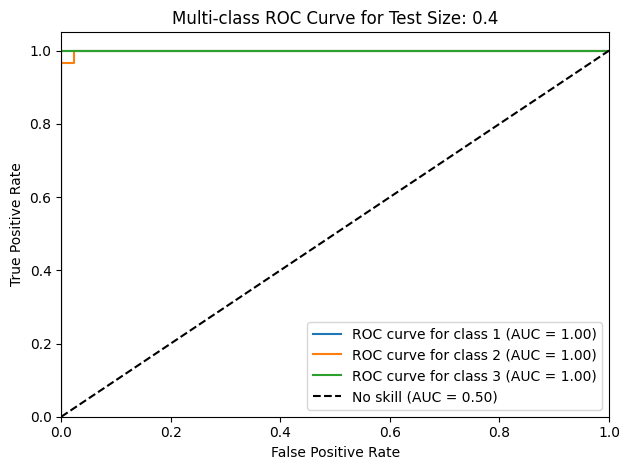

--------------------------------------------------

Running RandomForestClassifier with Test Size 0.5...
Accuracy: 0.9775280898876404
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.97        30
           2       0.95      1.00      0.97        35
           3       1.00      1.00      1.00        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89

Plotting Confusion Matrix...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


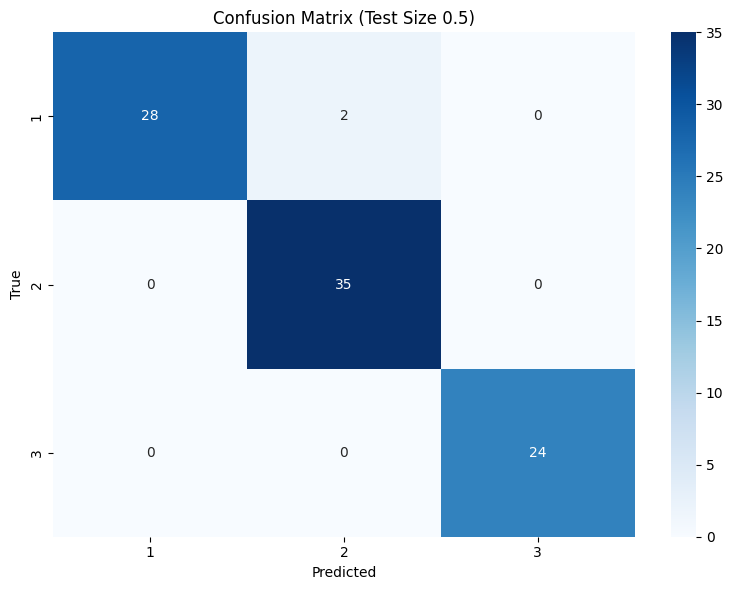

Plotting ROC-AUC...


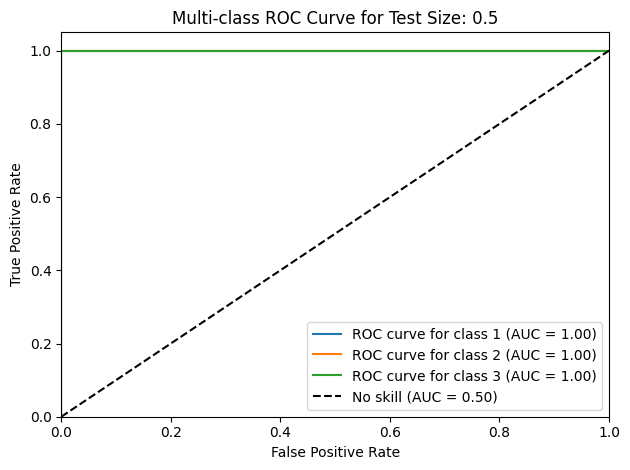

--------------------------------------------------

Plotting Accuracy Bar Graph Across All Test Sizes...


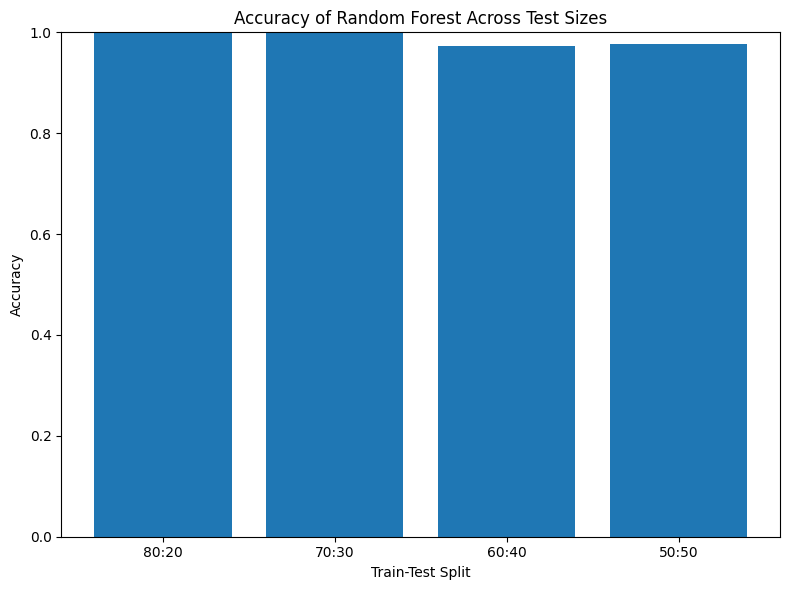

In [20]:
random_forest_classifier(
    X=wine_features_scaled,
    Y=wine_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    n_estimators=100,
    max_depth=5,
    random_state=2
)


## SVC Classifier with PCA

Running SVC with kernel 'linear' and test size 0.2...
running for pca
Kernel: linear, Test Size: 0.2
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.85      1.00      0.92        11
           3       1.00      0.92      0.96        13

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.95      0.94      0.95        36

----------------------------------------------------------------------------------------------
Running SVC with kernel 'linear' and test size 0.3...
running for pca
Kernel: linear, Test Size: 0.3
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        20
           3       1.00      0.95      0.97        19



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

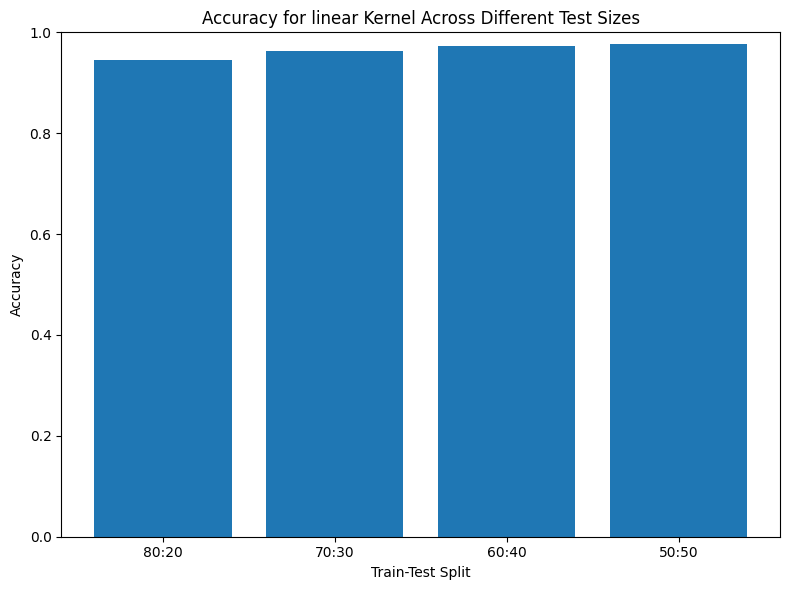

Running SVC with kernel 'poly' and test size 0.2...
running for pca
Kernel: poly, Test Size: 0.2
Accuracy: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.79      1.00      0.88        11
           3       1.00      0.92      0.96        13

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.93      0.92      0.92        36

----------------------------------------------------------------------------------------------
Running SVC with kernel 'poly' and test size 0.3...
running for pca
Kernel: poly, Test Size: 0.3
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.87      1.00      0.93        20
           3       1.00      0.89      0.94        19

    accu

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

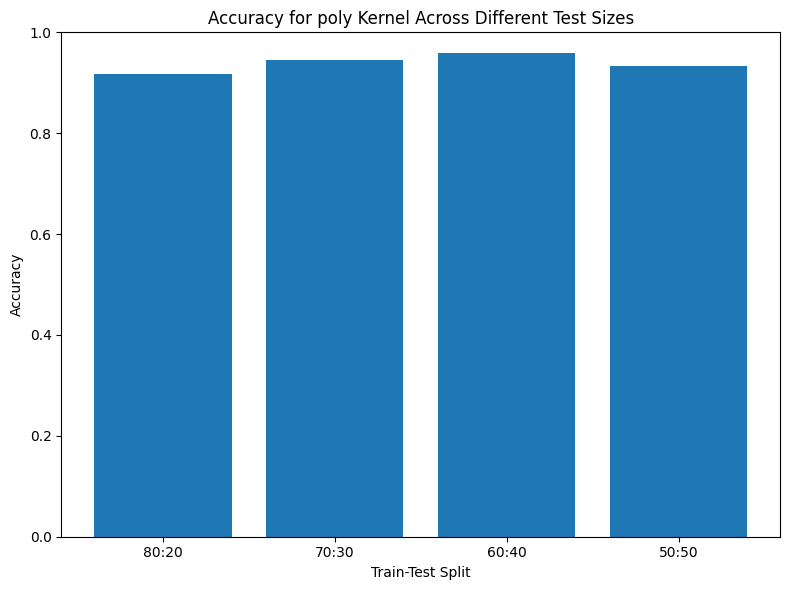

Running SVC with kernel 'rbf' and test size 0.2...
running for pca
Kernel: rbf, Test Size: 0.2
Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        11
           3       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

----------------------------------------------------------------------------------------------
Running SVC with kernel 'rbf' and test size 0.3...
running for pca
Kernel: rbf, Test Size: 0.3
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.91      1.00      0.95        20
           3       1.00      0.89      0.94        19

    accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

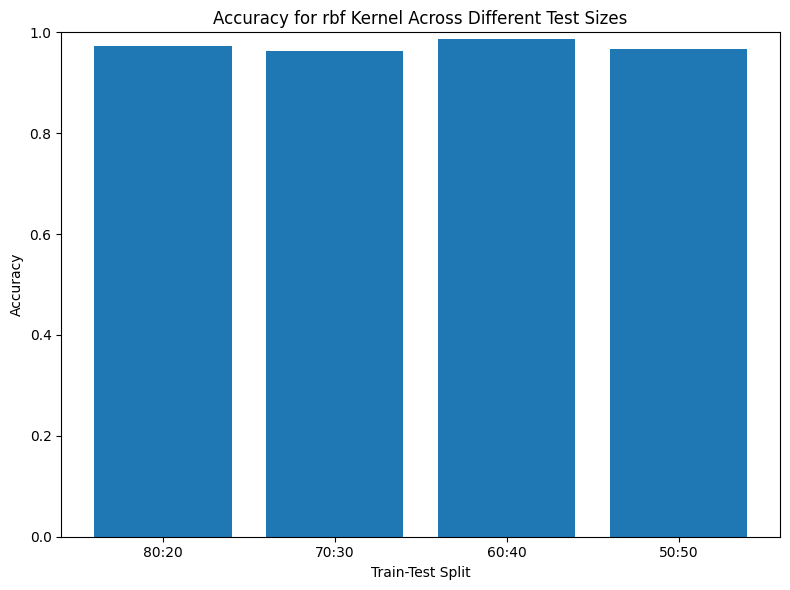

Running SVC with kernel 'sigmoid' and test size 0.2...
running for pca
Kernel: sigmoid, Test Size: 0.2
Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

----------------------------------------------------------------------------------------------
Running SVC with kernel 'sigmoid' and test size 0.3...
running for pca
Kernel: sigmoid, Test Size: 0.3
Accuracy: 0.9259259259259259
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.90      0.95      0.93        20
           3       1.00      0.95      0.97        

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

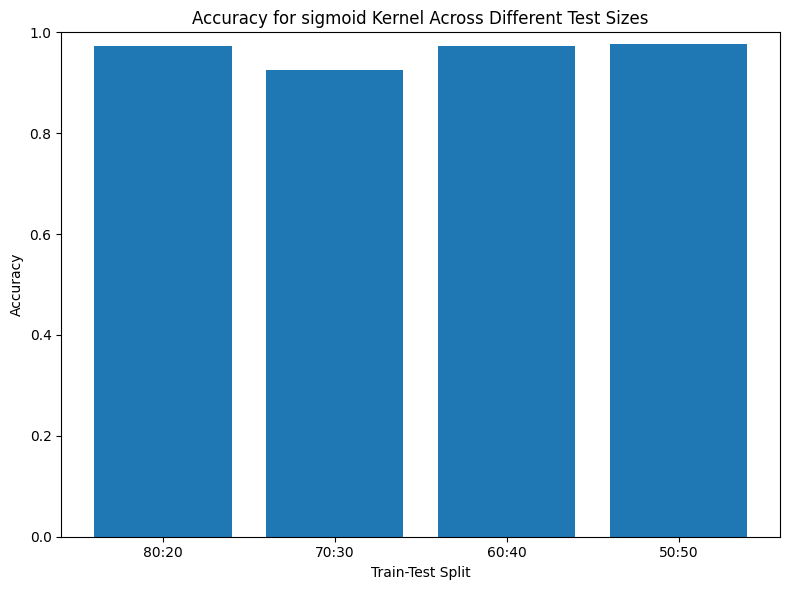

In [21]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
test_sizes = [0.2, 0.3, 0.4, 0.5]

# Call the function to run SVC classifier for each kernel and test size
svc_classifier_with_pca(X=wine_features_scaled, Y=wine_targets, kernels=kernels, test_sizes=test_sizes)

## MLP Classifier with PCA


Running MLPClassifier with Test Size 0.2 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36


Running MLPClassifier with Test Size 0.3 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Running MLPClassifier with Test Size 0.4 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72


Running MLPClassifier with Test Size 0.5 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9438202247191011
Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        30
           2       0.97      0.89      0.93        35
           3       0.96      0.96      0.96        24

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89


Plotting Accuracy Bar Graph Across All Test Sizes...


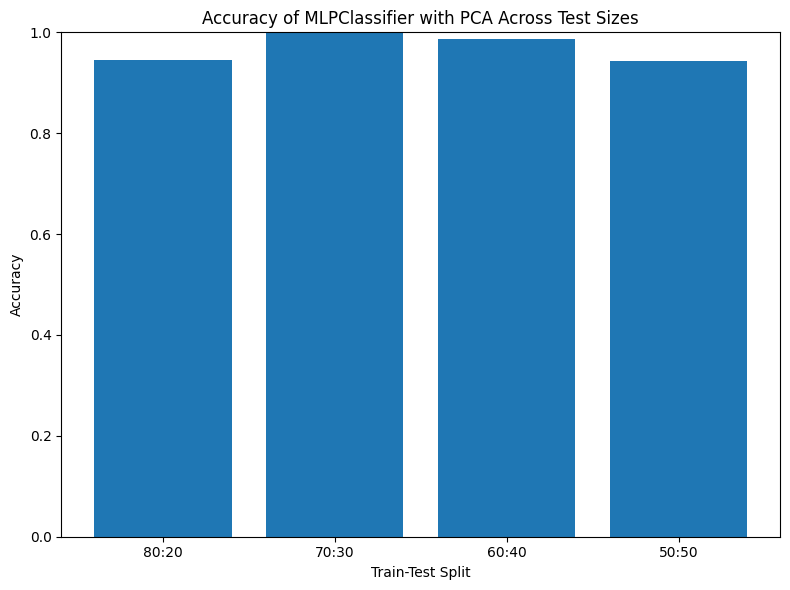

In [22]:
# Assuming `wine_features` and `wine_targets` are already defined
mlp_classifier_with_pca(
    X=wine_features_scaled,
    Y=wine_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    momentum=0.95,
    max_iter=1000,
    learning_rate='adaptive',
    n_components=5
)



## Random Forest With PCA


Running Random ForestClassifier with Test Size 0.2 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36


Running Random ForestClassifier with Test Size 0.3 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54


Running Random ForestClassifier with Test Size 0.4 and PCA n_components=5...
Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        24
           2       1.00      0.90      0.95        29
           3       0.95      1.00      0.97        19

    accuracy                           0.96        72
   macro avg       0.96      0.97      0.96        72
weighted avg       0.96      0.96      0.96        72


Running Random ForestClassifier with Test Size 0.5 an

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9438202247191011
Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        30
           2       1.00      0.86      0.92        35
           3       1.00      1.00      1.00        24

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89


Plotting Accuracy Bar Graph Across All Test Sizes...


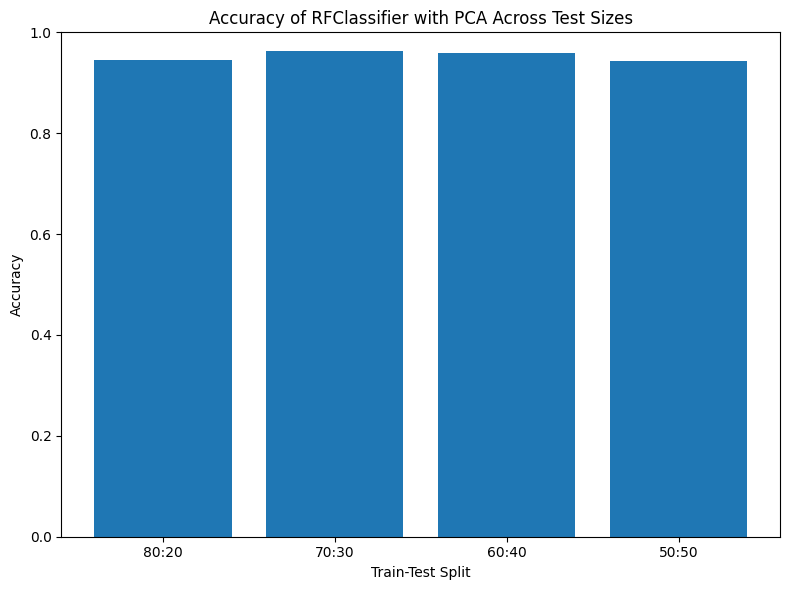

In [23]:
random_forest_classifier_with_pca(
    X=wine_features_scaled,
    Y=wine_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    n_estimators=100,
    max_depth=5,
    random_state=2
)

# **Handwritten Digit Dataset Fetching**

In [24]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
digit = fetch_ucirepo(id=80)

In [25]:
import pandas as pd
import numpy as np

# Convert features and targets into DataFrames
digit_features = pd.DataFrame(digit.data.features, columns=digit.data.feature_names)
digit_targets = pd.DataFrame(digit.data.targets, columns=digit.data.target_names)

# Optionally, combine features and target into a single DataFrame
digit_dataset = pd.concat([digit_features, digit_targets], axis=1)
digit_dataset.head()

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute56  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            0   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...            0   

   Attribute57  Attribute58  Attribute59  Attribute60  Attribute61  \
0            0            0            6           14            7   
1            0            0           10           16           15   
2            0            0            9           14            0   
3            0            0            0            1           15   
4            0            0            4           12           14   

   Attribute62  Attribute63  Attribute64  class  
0            1            0            0      0  
1            3            0            0      0  
2            0            0            0      7  
3            2            0            0      4  
4            7            0            0      6  

[5 rows x 65 columns]

In [26]:
#checking for null value
digit_dataset.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
              ..
Attribute61    0
Attribute62    0
Attribute63    0
Attribute64    0
class          0
Length: 65, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the features and transform
scaled_features = scaler.fit_transform(digit_features)
# Step 3: Convert scaled features back to DataFrame (to preserve column names)
digit_features_scaled = pd.DataFrame(scaled_features, columns=digit_features.columns)

## SVC Classifier

Running SVC with linear kernel and test size 0.2...
Accuracy: 0.9822064056939501
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       0.93      0.99      0.96       101
           2       1.00      1.00      1.00       118
           3       0.98      0.98      0.98       108
           4       0.98      0.94      0.96       120
           5       0.99      0.97      0.98       105
           6       1.00      0.99      1.00       118
           7       1.00      0.99      1.00       112
           8       0.98      0.97      0.98       107
           9       0.96      0.98      0.97       125

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


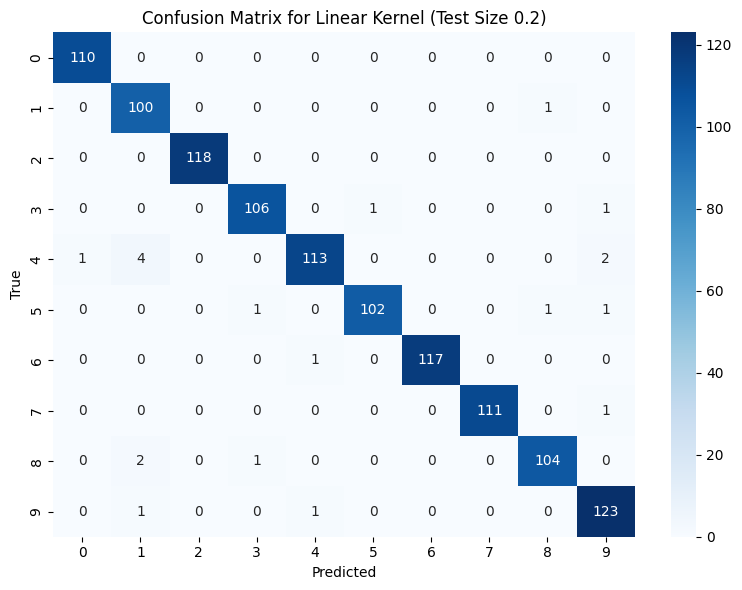

Plotting ROC-AUC...


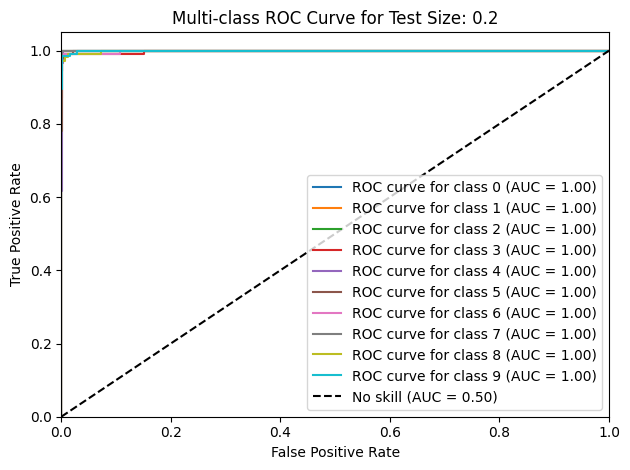

--------------------------------------------------
Running SVC with linear kernel and test size 0.3...
Accuracy: 0.9816132858837485
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       159
           1       0.94      0.99      0.97       164
           2       1.00      0.99      0.99       179
           3       0.97      0.99      0.98       167
           4       0.98      0.97      0.97       172
           5       0.98      0.98      0.98       164
           6       0.99      0.98      0.99       168
           7       0.99      0.99      0.99       159
           8       1.00      0.96      0.98       164
           9       0.97      0.96      0.97       190

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686

--------------------------------------------------------------------------------------

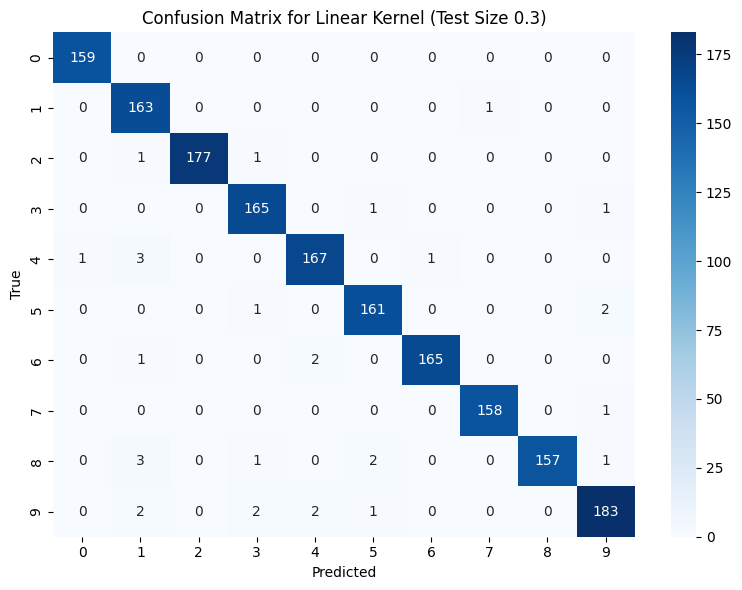

Plotting ROC-AUC...


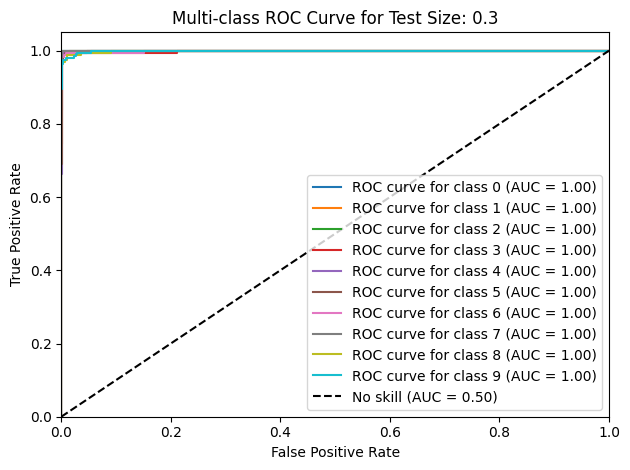

--------------------------------------------------
Running SVC with linear kernel and test size 0.4...
Accuracy: 0.9764234875444839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       218
           1       0.95      0.98      0.96       230
           2       1.00      0.99      0.99       231
           3       0.97      0.99      0.98       223
           4       0.95      0.97      0.96       226
           5       0.97      0.99      0.98       218
           6       0.99      0.98      0.98       230
           7       0.99      0.98      0.99       203
           8       0.99      0.95      0.97       228
           9       0.97      0.95      0.96       241

    accuracy                           0.98      2248
   macro avg       0.98      0.98      0.98      2248
weighted avg       0.98      0.98      0.98      2248

--------------------------------------------------------------------------------------

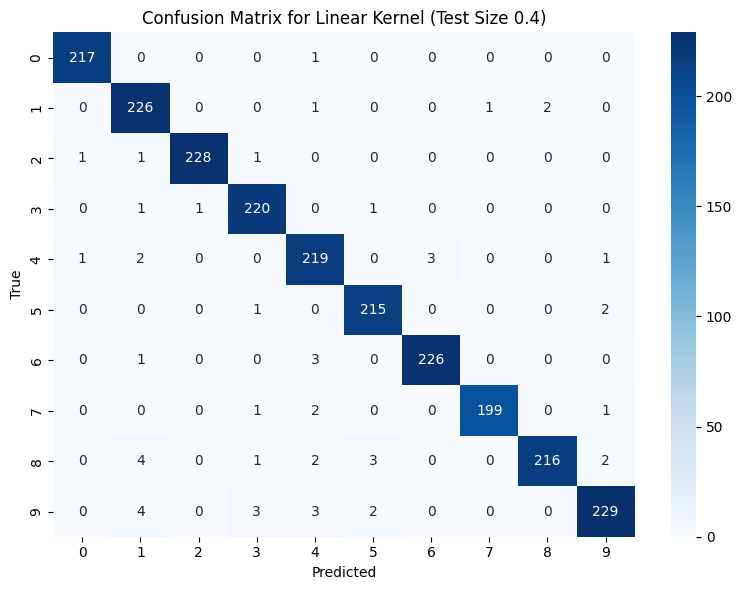

Plotting ROC-AUC...


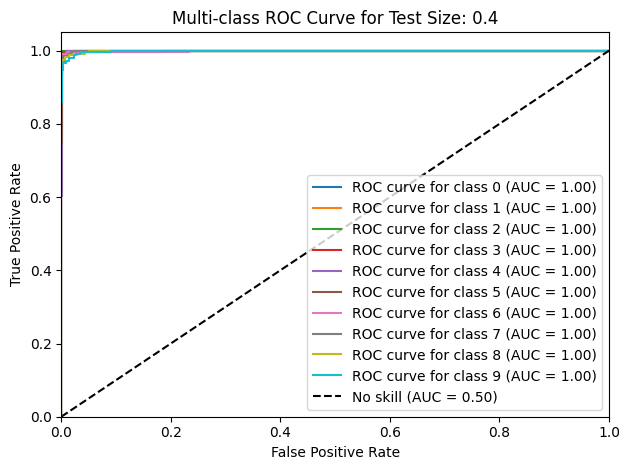

--------------------------------------------------
Running SVC with linear kernel and test size 0.5...
Accuracy: 0.9779359430604982
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       281
           1       0.95      0.99      0.97       283
           2       1.00      0.99      0.99       283
           3       0.97      0.98      0.98       273
           4       0.95      0.98      0.96       289
           5       0.98      0.99      0.98       280
           6       0.99      0.99      0.99       293
           7       0.99      0.98      0.99       251
           8       0.99      0.96      0.97       284
           9       0.97      0.94      0.96       293

    accuracy                           0.98      2810
   macro avg       0.98      0.98      0.98      2810
weighted avg       0.98      0.98      0.98      2810

--------------------------------------------------------------------------------------

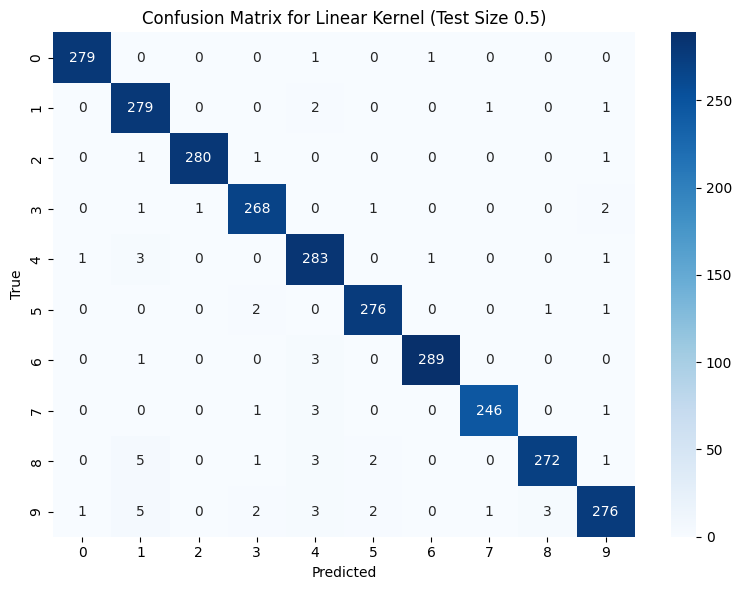

Plotting ROC-AUC...


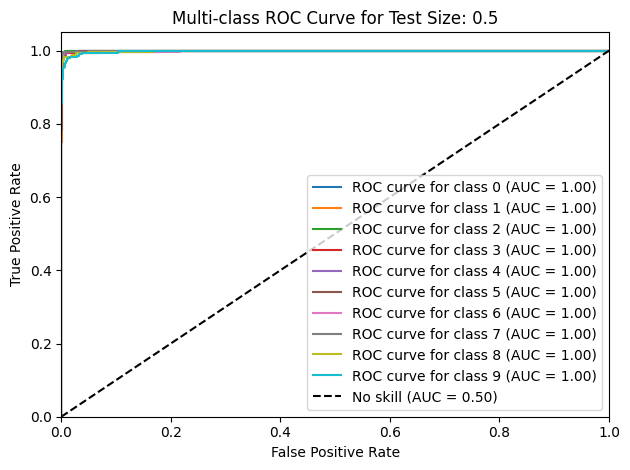

--------------------------------------------------
Plotting accuracy bar graph...


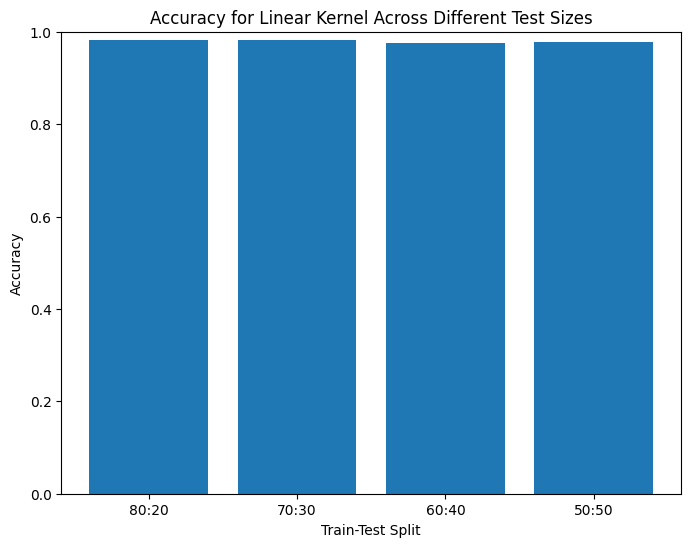

In [28]:

test_sizes = [0.2, 0.3, 0.4, 0.5]

svc_linear_kernel(digit_features_scaled,digit_targets['class'],test_sizes)

Running SVC with polynomial kernel and test size 0.2...
Accuracy: 0.9839857651245552
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.98      0.99      0.99       101
           2       1.00      0.99      1.00       118
           3       1.00      0.96      0.98       108
           4       0.98      0.97      0.98       120
           5       0.98      0.99      0.99       105
           6       1.00      0.97      0.99       118
           7       1.00      1.00      1.00       112
           8       0.92      1.00      0.96       107
           9       0.98      0.98      0.98       125

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


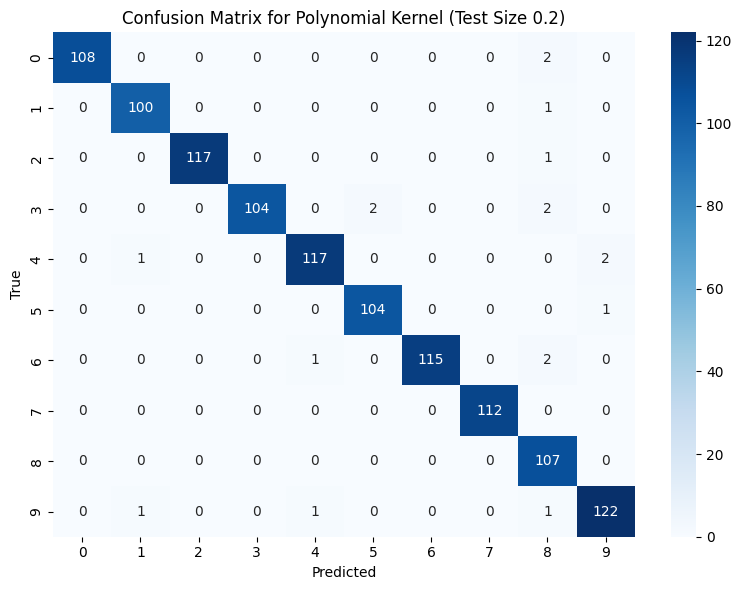

Plotting ROC-AUC...


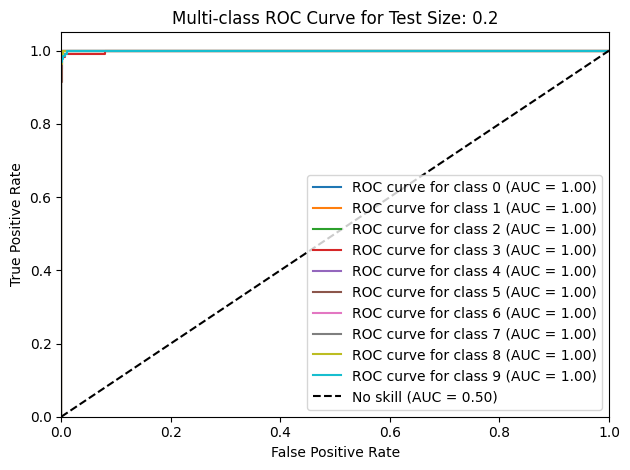

--------------------------------------------------
Running SVC with polynomial kernel and test size 0.3...
Accuracy: 0.9804270462633452
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       159
           1       0.98      0.99      0.98       164
           2       1.00      0.99      1.00       179
           3       0.99      0.96      0.97       167
           4       0.99      0.98      0.98       172
           5       0.99      0.98      0.98       164
           6       1.00      0.98      0.99       168
           7       0.99      1.00      0.99       159
           8       0.90      0.99      0.94       164
           9       0.98      0.96      0.97       190

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686

----------------------------------------------------------------------------------

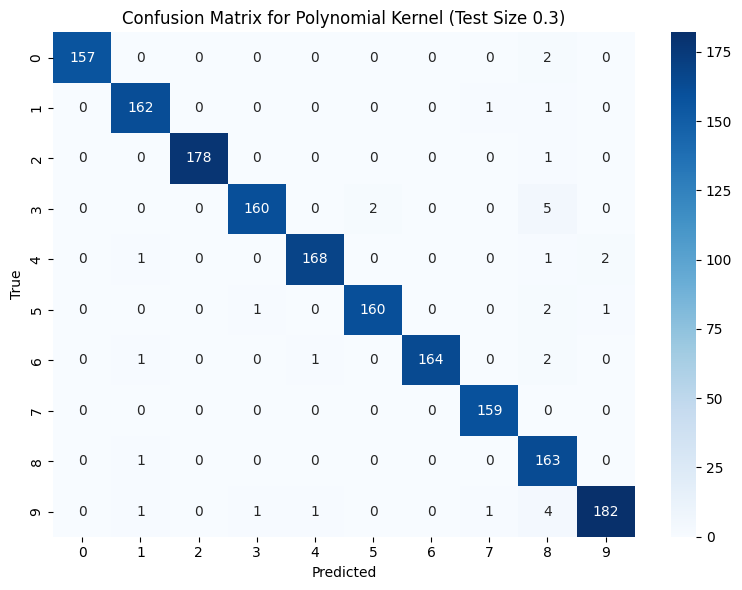

Plotting ROC-AUC...


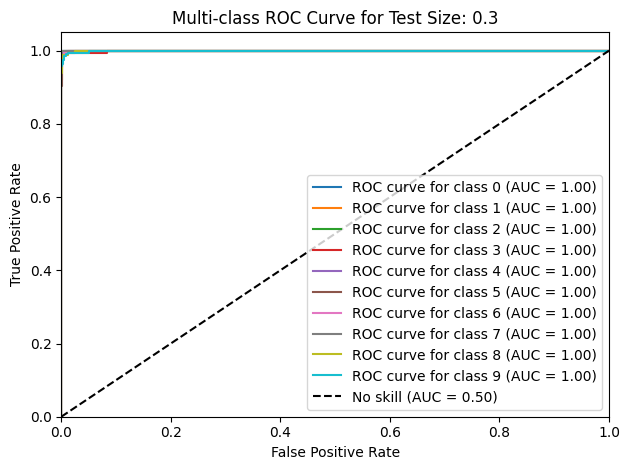

--------------------------------------------------
Running SVC with polynomial kernel and test size 0.4...
Accuracy: 0.9777580071174378
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       0.98      0.98      0.98       230
           2       1.00      0.98      0.99       231
           3       0.98      0.96      0.97       223
           4       0.98      0.97      0.98       226
           5       0.99      0.98      0.98       218
           6       1.00      0.98      0.99       230
           7       0.99      0.99      0.99       203
           8       0.90      1.00      0.95       228
           9       0.97      0.95      0.96       241

    accuracy                           0.98      2248
   macro avg       0.98      0.98      0.98      2248
weighted avg       0.98      0.98      0.98      2248

----------------------------------------------------------------------------------

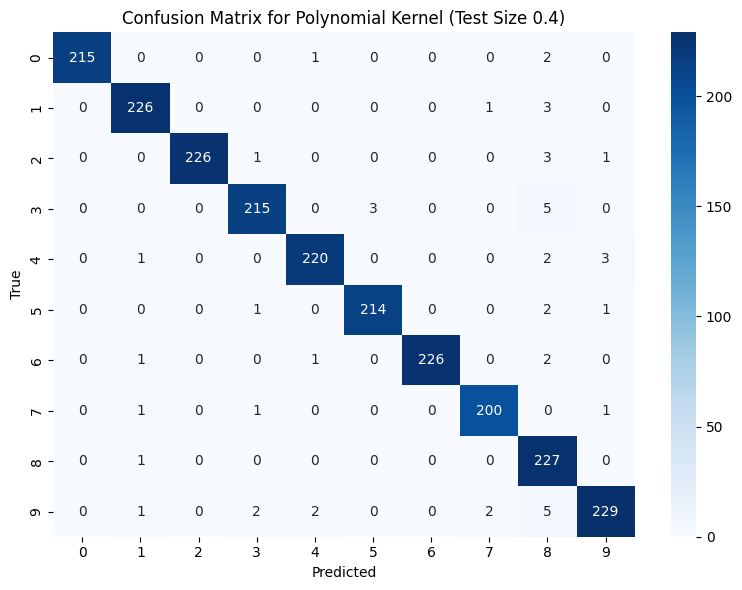

Plotting ROC-AUC...


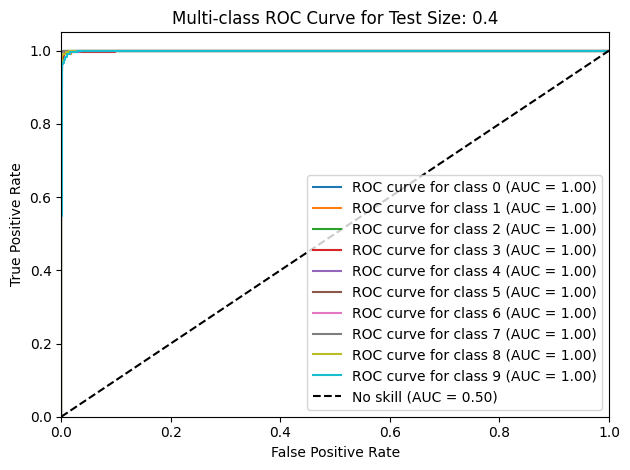

--------------------------------------------------
Running SVC with polynomial kernel and test size 0.5...
Accuracy: 0.9740213523131672
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       281
           1       0.97      0.98      0.98       283
           2       1.00      0.98      0.99       283
           3       0.99      0.95      0.97       273
           4       0.99      0.97      0.98       289
           5       0.99      0.98      0.99       280
           6       0.99      0.99      0.99       293
           7       0.99      0.99      0.99       251
           8       0.86      0.99      0.92       284
           9       0.97      0.93      0.95       293

    accuracy                           0.97      2810
   macro avg       0.98      0.97      0.97      2810
weighted avg       0.98      0.97      0.97      2810

----------------------------------------------------------------------------------

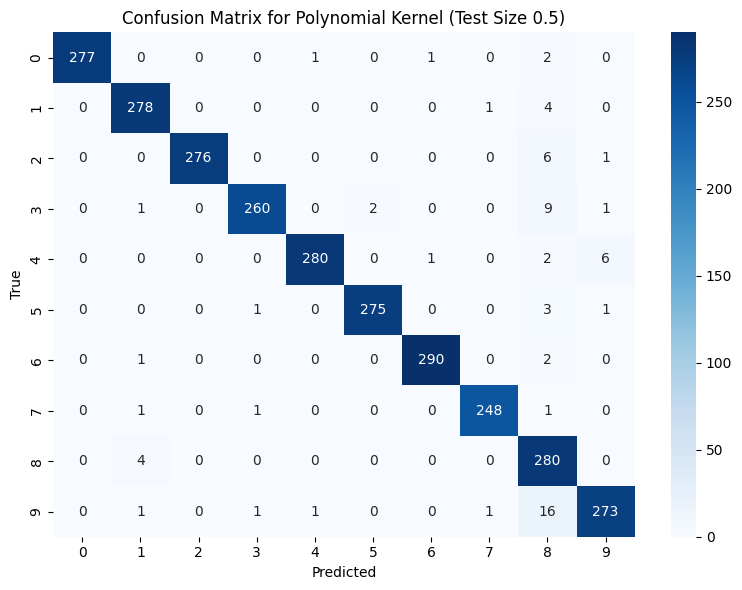

Plotting ROC-AUC...


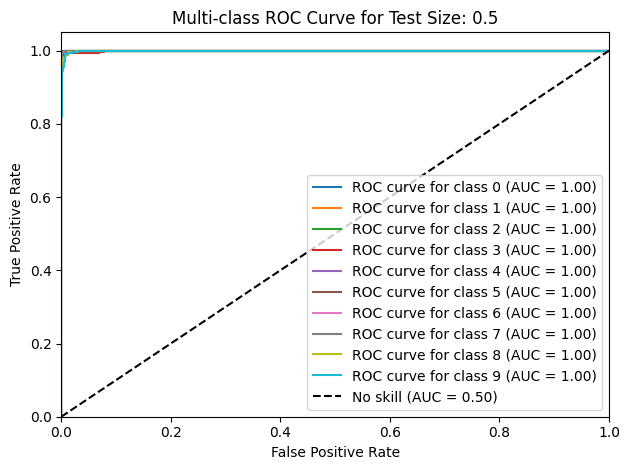

--------------------------------------------------
Plotting accuracy bar graph...


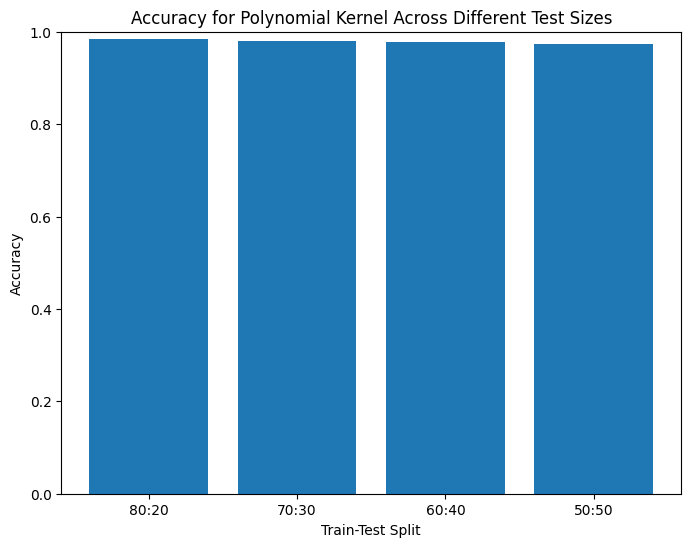

In [29]:
svc_poly_kernel(digit_features_scaled,digit_targets['class'],test_sizes)

Running SVC with RBF kernel and test size 0.2...
Accuracy: 0.9848754448398577
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       0.93      1.00      0.96       101
           2       1.00      0.99      1.00       118
           3       1.00      0.97      0.99       108
           4       0.98      0.97      0.98       120
           5       0.99      0.98      0.99       105
           6       1.00      0.99      1.00       118
           7       0.99      1.00      1.00       112
           8       0.98      0.98      0.98       107
           9       0.98      0.96      0.97       125

    accuracy                           0.98      1124
   macro avg       0.98      0.99      0.98      1124
weighted avg       0.99      0.98      0.98      1124

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


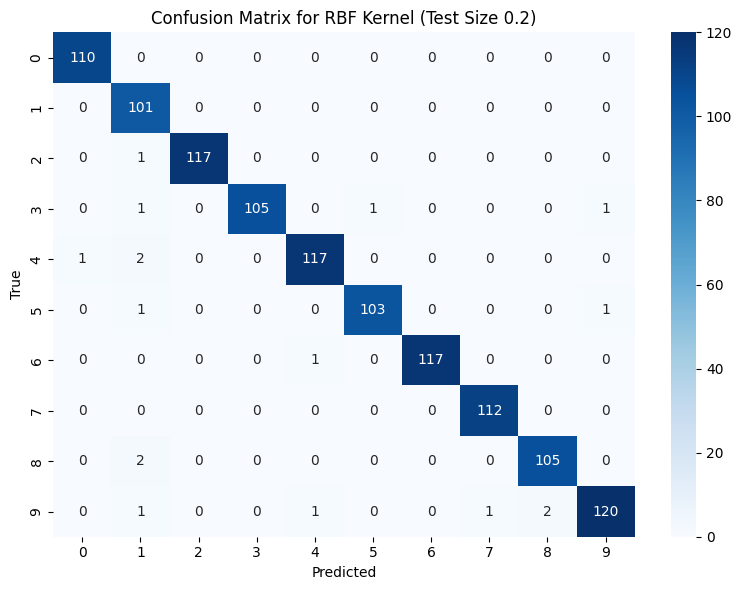

Plotting ROC-AUC...


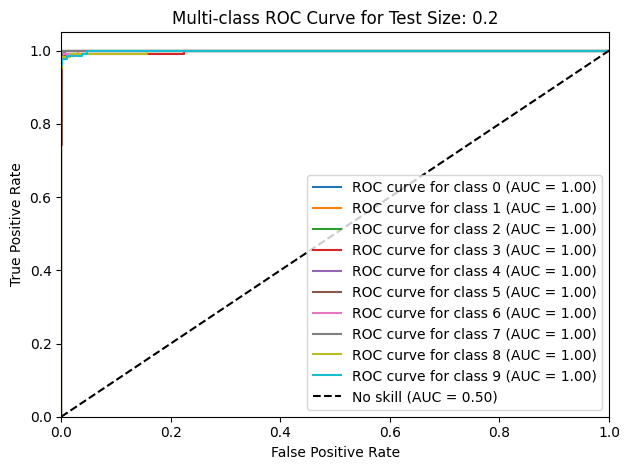

--------------------------------------------------
Running SVC with RBF kernel and test size 0.3...
Accuracy: 0.9810201660735468
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       159
           1       0.94      0.99      0.96       164
           2       1.00      0.99      0.99       179
           3       0.98      0.98      0.98       167
           4       0.98      0.98      0.98       172
           5       0.99      0.98      0.98       164
           6       0.99      0.98      0.99       168
           7       0.98      0.99      0.99       159
           8       0.98      0.98      0.98       164
           9       0.98      0.95      0.96       190

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686

-----------------------------------------------------------------------------------------

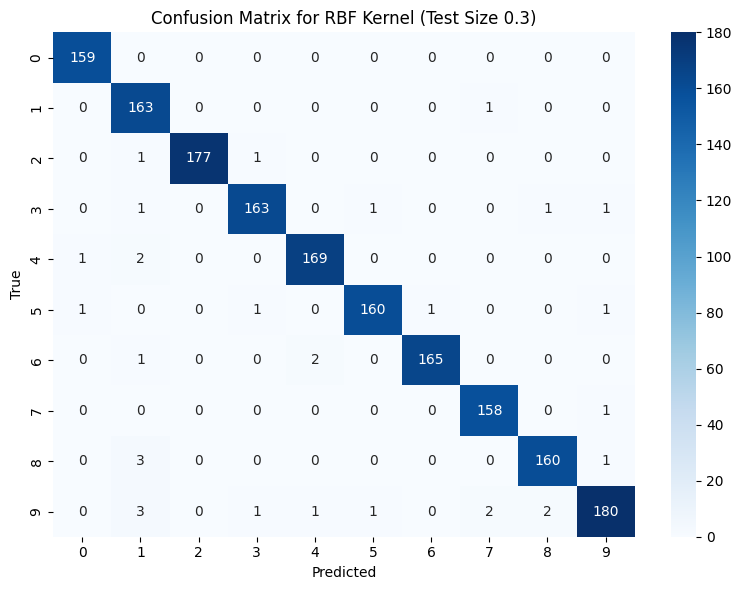

Plotting ROC-AUC...


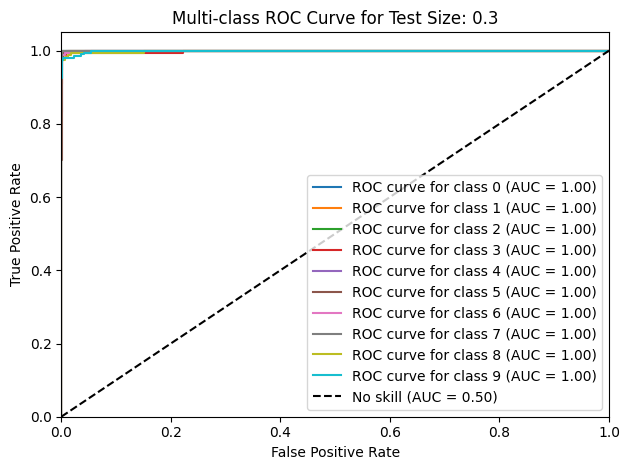

--------------------------------------------------
Running SVC with RBF kernel and test size 0.4...
Accuracy: 0.9795373665480427
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       0.95      0.99      0.97       230
           2       1.00      0.99      0.99       231
           3       0.98      0.98      0.98       223
           4       0.96      0.97      0.97       226
           5       0.98      0.98      0.98       218
           6       1.00      0.98      0.99       230
           7       0.99      0.98      0.98       203
           8       0.98      0.98      0.98       228
           9       0.97      0.95      0.96       241

    accuracy                           0.98      2248
   macro avg       0.98      0.98      0.98      2248
weighted avg       0.98      0.98      0.98      2248

-----------------------------------------------------------------------------------------

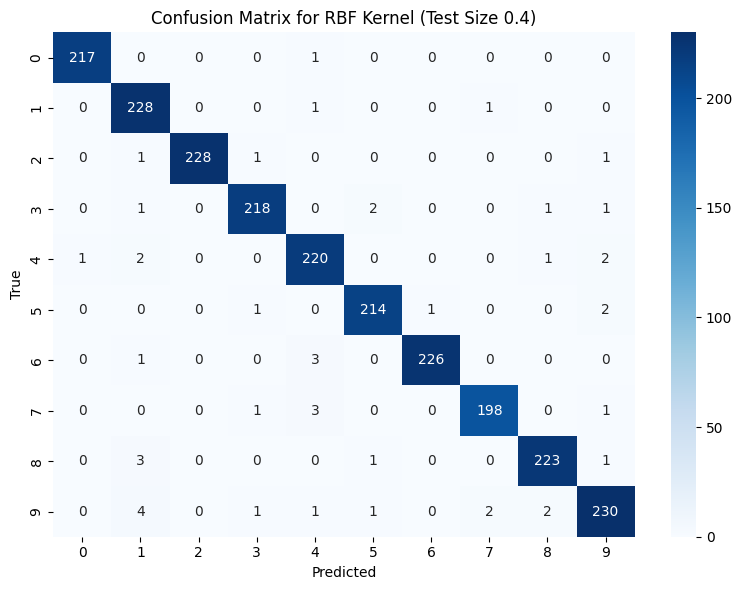

Plotting ROC-AUC...


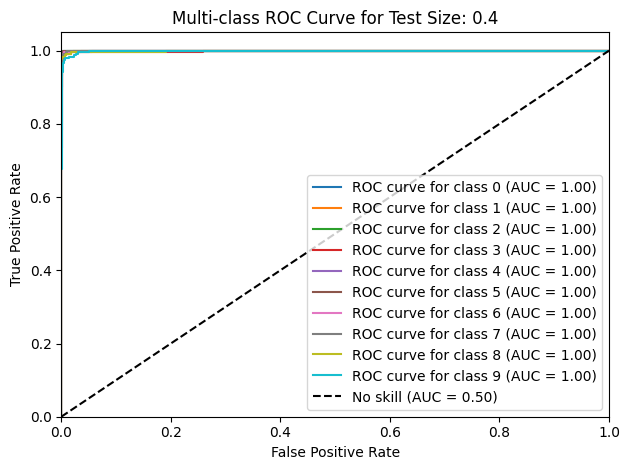

--------------------------------------------------
Running SVC with RBF kernel and test size 0.5...
Accuracy: 0.9807829181494662
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       281
           1       0.95      0.99      0.97       283
           2       1.00      0.99      1.00       283
           3       0.99      0.98      0.98       273
           4       0.97      0.98      0.97       289
           5       0.98      0.99      0.98       280
           6       0.99      0.99      0.99       293
           7       0.98      0.98      0.98       251
           8       0.98      0.97      0.98       284
           9       0.97      0.95      0.96       293

    accuracy                           0.98      2810
   macro avg       0.98      0.98      0.98      2810
weighted avg       0.98      0.98      0.98      2810

-----------------------------------------------------------------------------------------

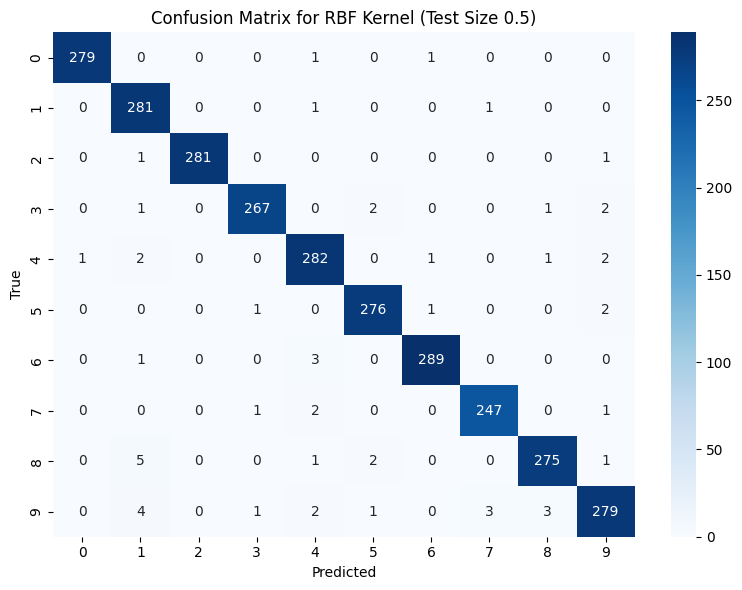

Plotting ROC-AUC...


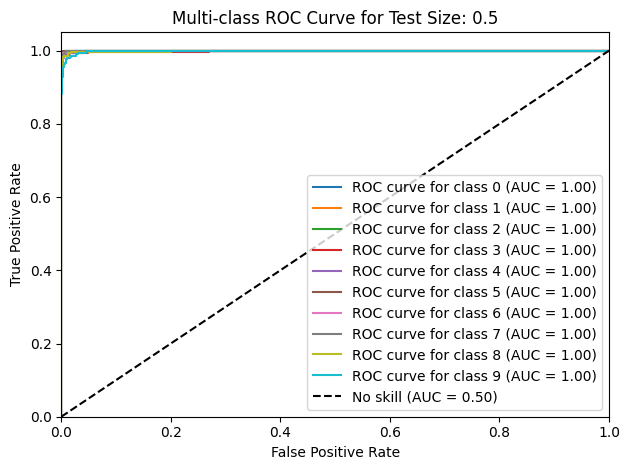

--------------------------------------------------
Plotting accuracy bar graph...


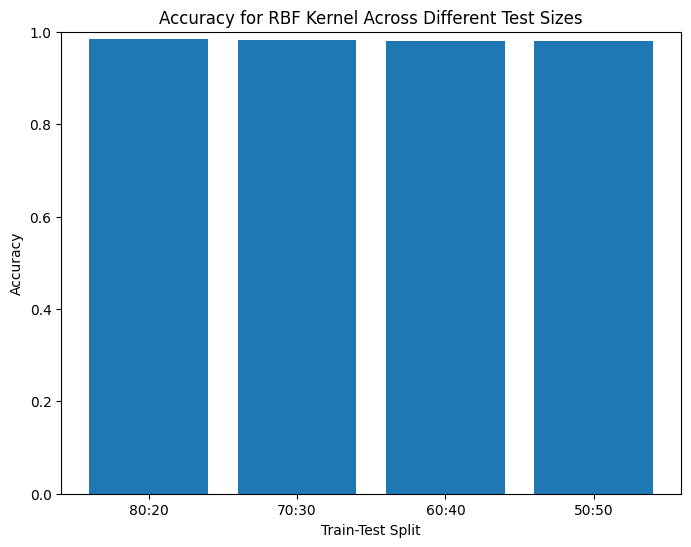

In [30]:
svc_rbf_kernel(digit_features_scaled,digit_targets['class'],test_sizes)

Running SVC with sigmoid kernel and test size 0.2...
Accuracy: 0.902135231316726
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.81      0.87      0.84       101
           2       0.93      0.88      0.90       118
           3       0.94      0.94      0.94       108
           4       0.84      0.88      0.86       120
           5       0.94      0.90      0.92       105
           6       0.96      0.97      0.97       118
           7       0.89      0.87      0.88       112
           8       0.88      0.86      0.87       107
           9       0.86      0.86      0.86       125

    accuracy                           0.90      1124
   macro avg       0.90      0.90      0.90      1124
weighted avg       0.90      0.90      0.90      1124

----------------------------------------------------------------------------------------------
Plotting confusion matrix...


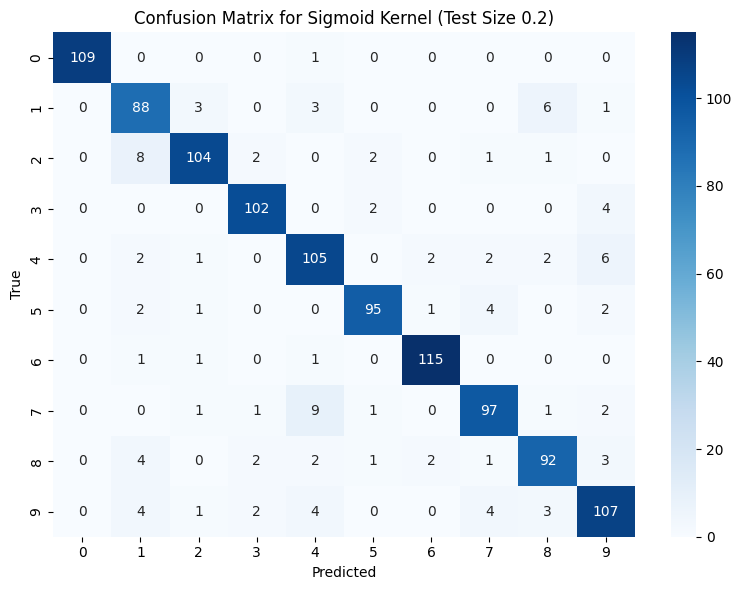

Plotting ROC-AUC...


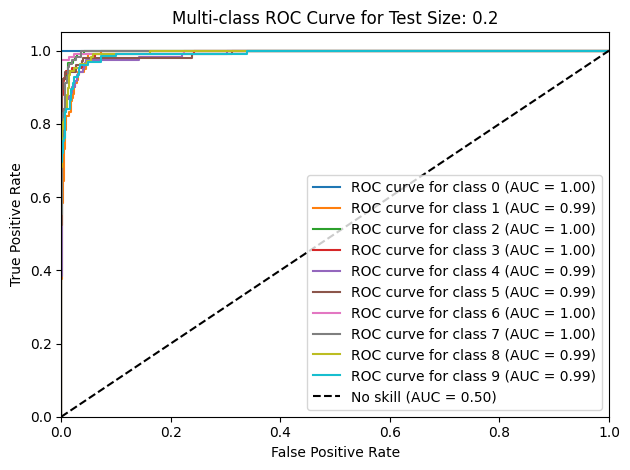

--------------------------------------------------
Running SVC with sigmoid kernel and test size 0.3...
Accuracy: 0.9181494661921709
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.84      0.88      0.86       164
           2       0.95      0.90      0.93       179
           3       0.92      0.95      0.93       167
           4       0.83      0.90      0.87       172
           5       0.97      0.92      0.94       164
           6       0.96      0.96      0.96       168
           7       0.90      0.89      0.90       159
           8       0.93      0.91      0.92       164
           9       0.90      0.88      0.89       190

    accuracy                           0.92      1686
   macro avg       0.92      0.92      0.92      1686
weighted avg       0.92      0.92      0.92      1686

-------------------------------------------------------------------------------------

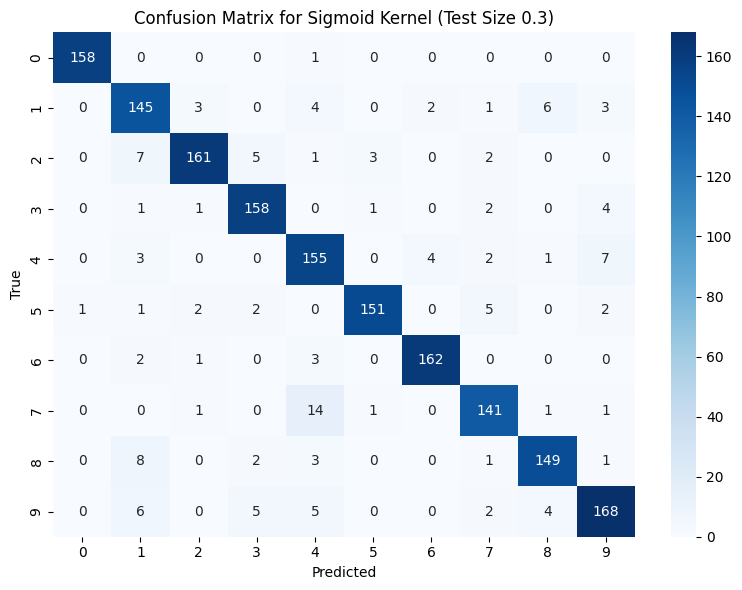

Plotting ROC-AUC...


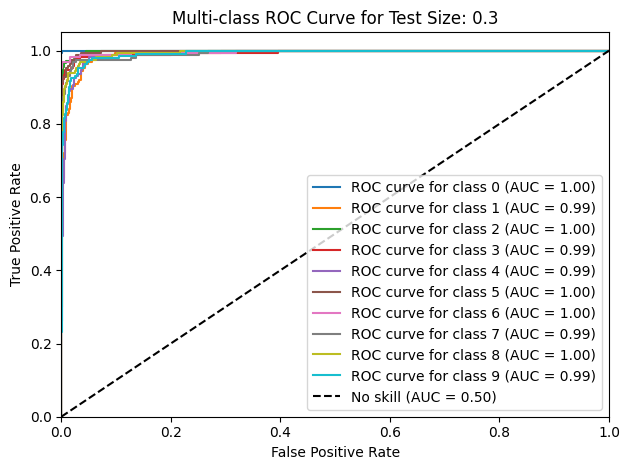

--------------------------------------------------
Running SVC with sigmoid kernel and test size 0.4...
Accuracy: 0.9110320284697508
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       218
           1       0.83      0.87      0.85       230
           2       0.91      0.87      0.89       231
           3       0.93      0.95      0.94       223
           4       0.83      0.91      0.87       226
           5       0.90      0.92      0.91       218
           6       0.97      0.96      0.97       230
           7       0.93      0.88      0.90       203
           8       0.93      0.89      0.91       228
           9       0.91      0.88      0.89       241

    accuracy                           0.91      2248
   macro avg       0.91      0.91      0.91      2248
weighted avg       0.91      0.91      0.91      2248

-------------------------------------------------------------------------------------

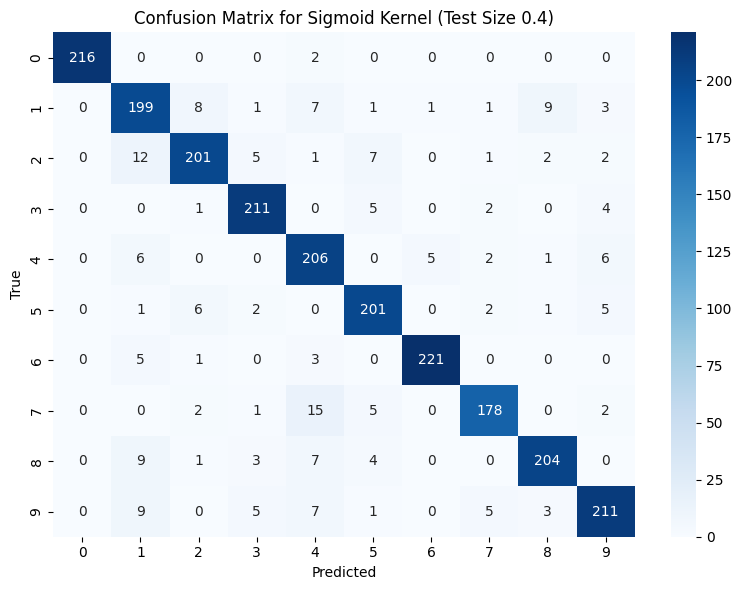

Plotting ROC-AUC...


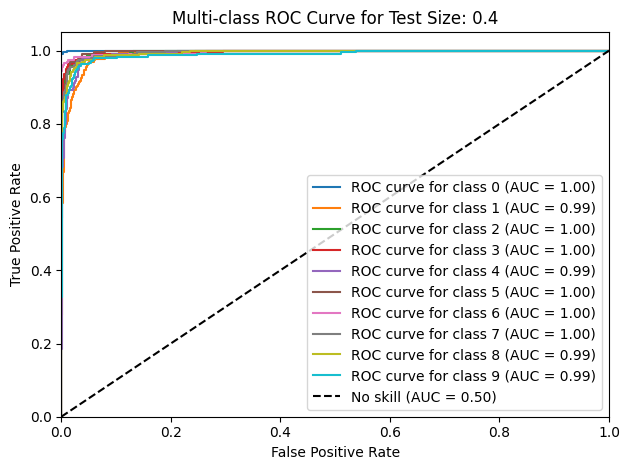

--------------------------------------------------
Running SVC with sigmoid kernel and test size 0.5...
Accuracy: 0.9049822064056939
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       281
           1       0.80      0.90      0.85       283
           2       0.89      0.89      0.89       283
           3       0.93      0.91      0.92       273
           4       0.84      0.89      0.86       289
           5       0.91      0.92      0.92       280
           6       0.96      0.96      0.96       293
           7       0.92      0.88      0.90       251
           8       0.92      0.87      0.89       284
           9       0.90      0.85      0.88       293

    accuracy                           0.90      2810
   macro avg       0.91      0.90      0.91      2810
weighted avg       0.91      0.90      0.91      2810

-------------------------------------------------------------------------------------

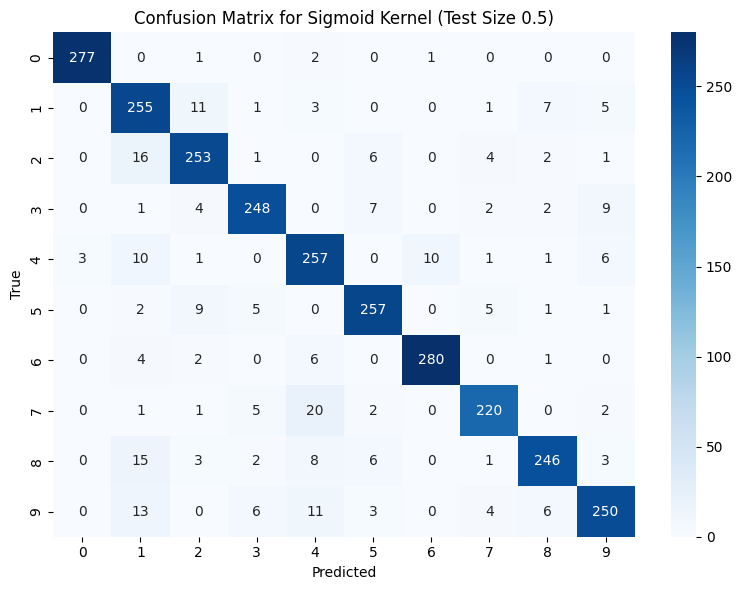

Plotting ROC-AUC...


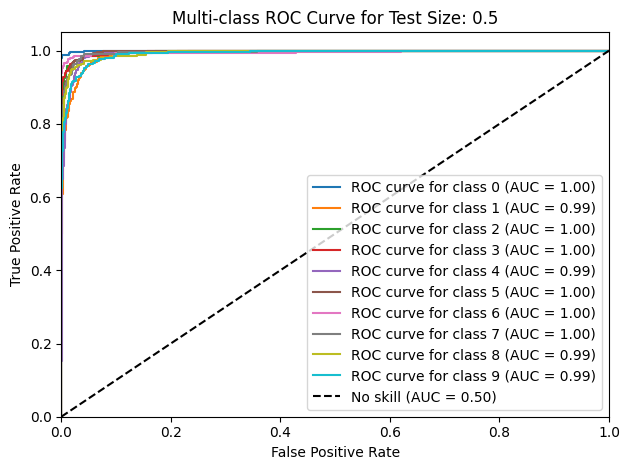

--------------------------------------------------
Plotting accuracy bar graph...


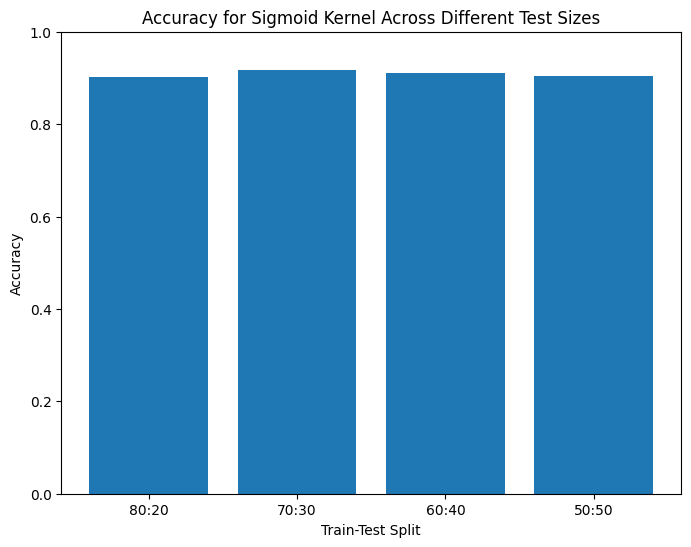

In [31]:
svc_sigmoid_kernel(digit_features_scaled,digit_targets['class'],test_sizes)

## MLP Classifier


Running MLPClassifier with Test Size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9555160142348754
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.92      0.95      0.94       102
           2       0.98      0.96      0.97       107
           3       0.97      0.95      0.96       118
           4       0.96      0.97      0.96       117
           5       0.95      0.91      0.93        97
           6       0.97      0.98      0.97       123
           7       0.98      0.98      0.98       124
           8       0.91      0.96      0.94       105
           9       0.92      0.92      0.92       123

    accuracy                           0.96      1124
   macro avg       0.96      0.95      0.95      1124
weighted avg       0.96      0.96      0.96      1124

Plotting Confusion Matrix...


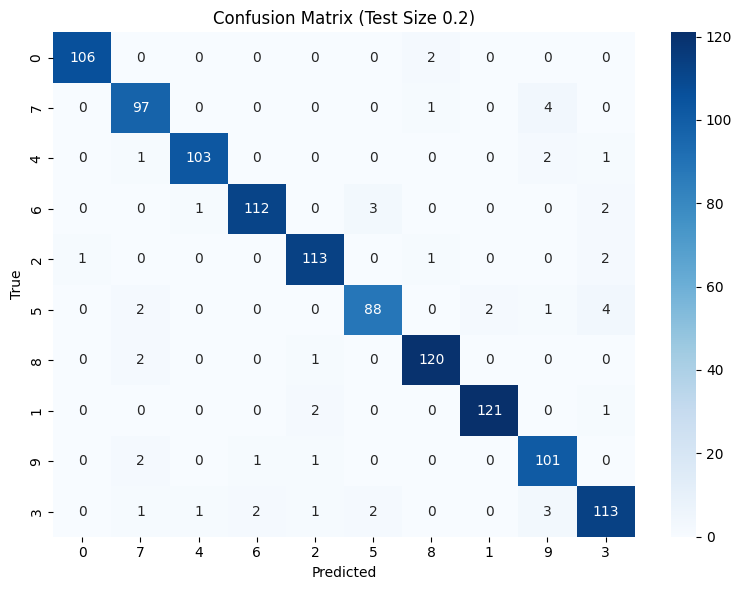

Plotting ROC-AUC...


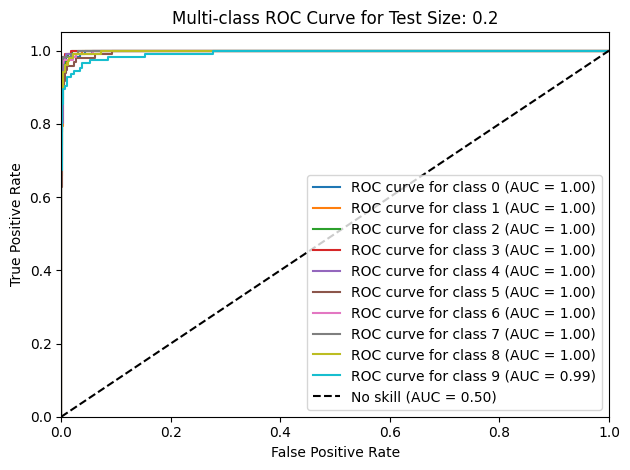

--------------------------------------------------

Running MLPClassifier with Test Size 0.3...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9596678529062871
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       170
           1       0.95      0.99      0.97       173
           2       0.98      0.94      0.96       154
           3       0.99      0.97      0.98       173
           4       0.97      0.96      0.96       182
           5       0.95      0.93      0.94       153
           6       0.97      0.98      0.97       168
           7       0.97      0.97      0.97       186
           8       0.92      0.95      0.93       153
           9       0.93      0.93      0.93       174

    accuracy                           0.96      1686
   macro avg       0.96      0.96      0.96      1686
weighted avg       0.96      0.96      0.96      1686

Plotting Confusion Matrix...


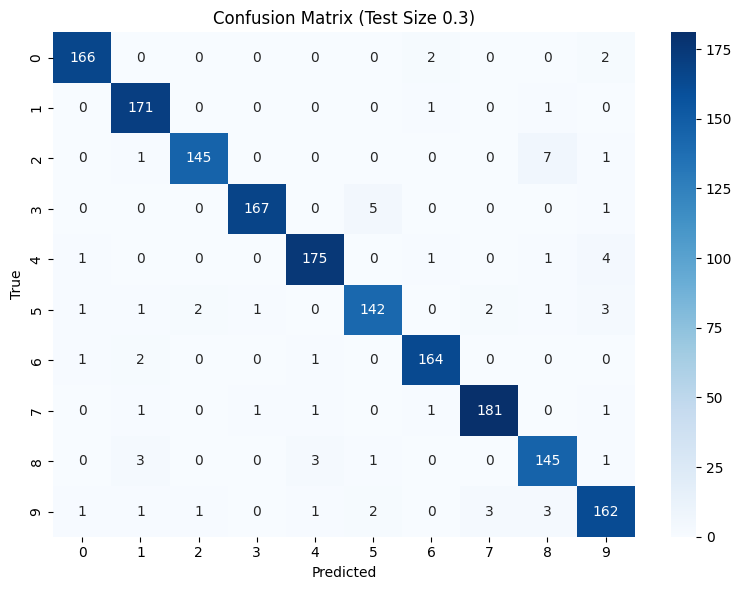

Plotting ROC-AUC...


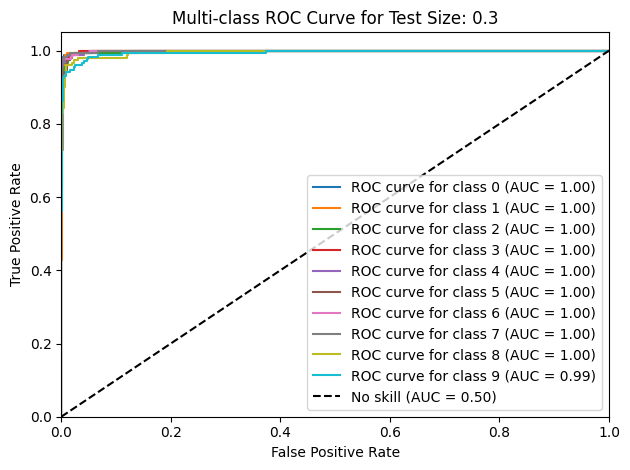

--------------------------------------------------

Running MLPClassifier with Test Size 0.4...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9546263345195729
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       215
           1       0.96      0.97      0.96       234
           2       0.98      0.97      0.97       209
           3       0.96      0.96      0.96       238
           4       0.97      0.93      0.95       240
           5       0.94      0.96      0.95       212
           6       0.96      0.97      0.97       225
           7       0.96      0.94      0.95       232
           8       0.93      0.93      0.93       215
           9       0.90      0.94      0.92       228

    accuracy                           0.95      2248
   macro avg       0.96      0.95      0.95      2248
weighted avg       0.96      0.95      0.95      2248

Plotting Confusion Matrix...


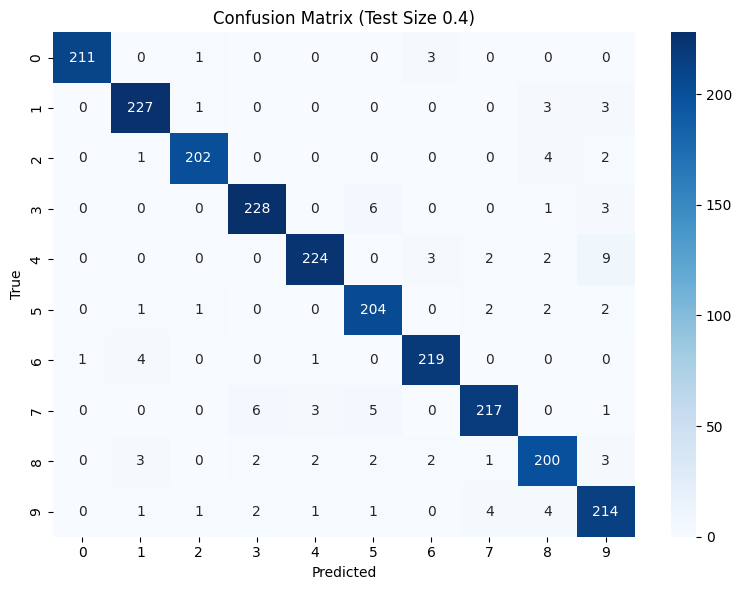

Plotting ROC-AUC...


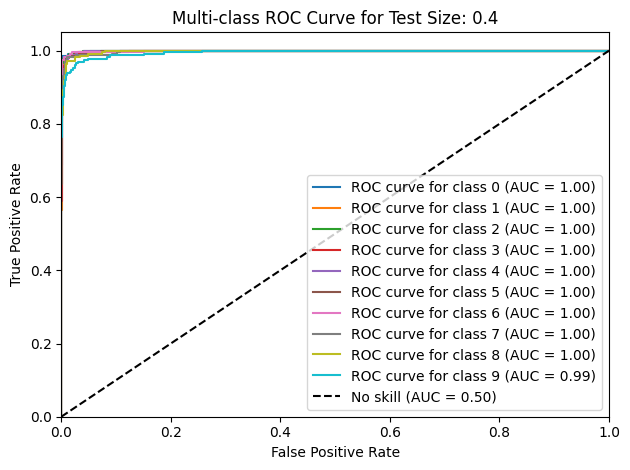

--------------------------------------------------

Running MLPClassifier with Test Size 0.5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9551601423487545
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       270
           1       0.97      0.97      0.97       294
           2       0.97      0.92      0.95       266
           3       0.97      0.95      0.96       298
           4       0.97      0.97      0.97       296
           5       0.92      0.94      0.93       267
           6       0.98      0.98      0.98       277
           7       0.97      0.94      0.96       295
           8       0.90      0.94      0.92       265
           9       0.91      0.95      0.93       282

    accuracy                           0.96      2810
   macro avg       0.96      0.95      0.95      2810
weighted avg       0.96      0.96      0.96      2810

Plotting Confusion Matrix...


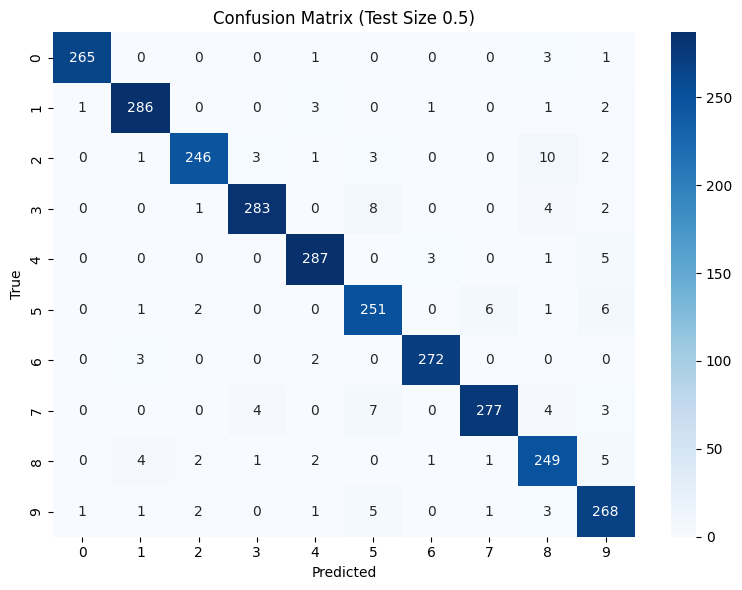

Plotting ROC-AUC...


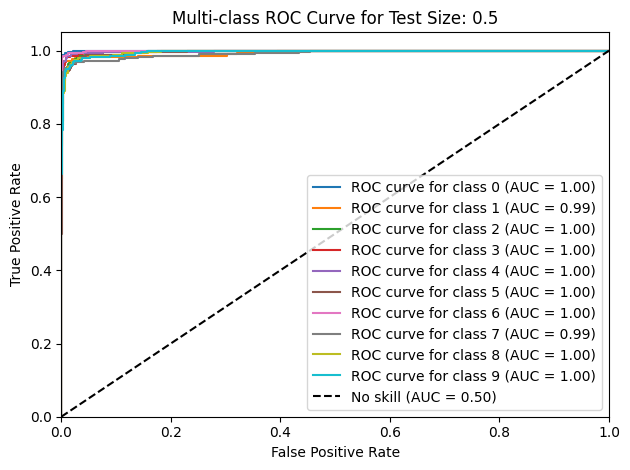

--------------------------------------------------

Plotting Accuracy Bar Graph Across All Test Sizes...


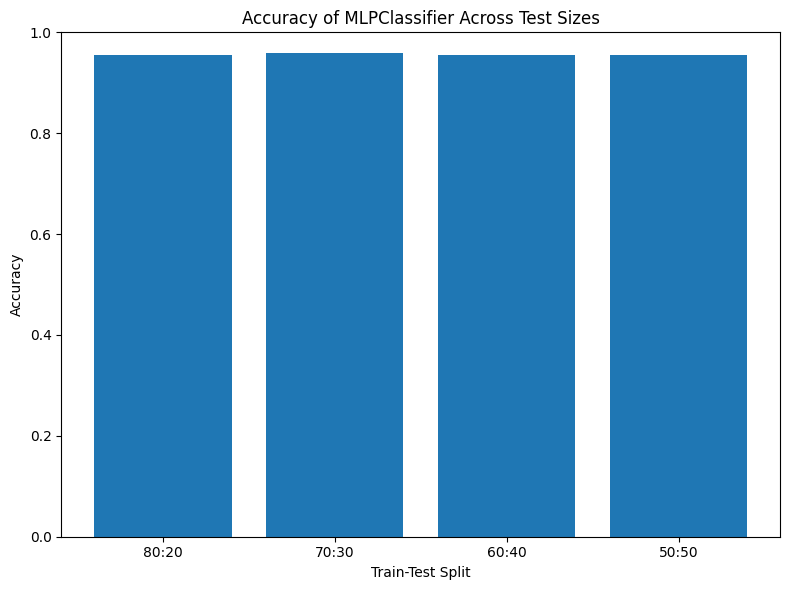

In [32]:
mlp_classifier(
    X=digit_features_scaled,
    Y=digit_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    momentum=0.95,
    max_iter=1000,
    learning_rate='adaptive'
)

## Random Forest Classifier


Running RandomForestClassifier with Test Size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.949288256227758
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       111
           1       0.94      0.97      0.96       114
           2       0.97      0.97      0.97       111
           3       0.91      0.92      0.92       114
           4       0.95      0.94      0.94       114
           5       0.96      0.89      0.93       112
           6       0.97      1.00      0.98       112
           7       0.97      0.98      0.97       113
           8       0.98      0.94      0.96       111
           9       0.87      0.89      0.88       112

    accuracy                           0.95      1124
   macro avg       0.95      0.95      0.95      1124
weighted avg       0.95      0.95      0.95      1124

Plotting Confusion Matrix...


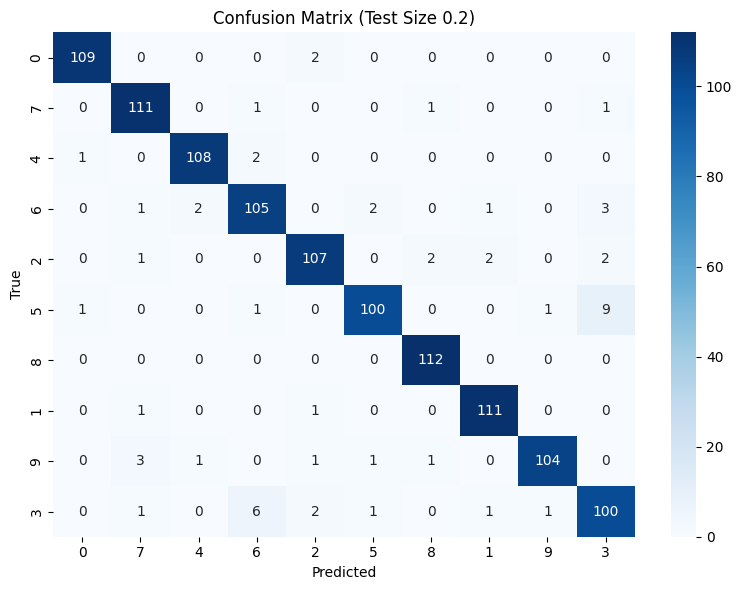

Plotting ROC-AUC...


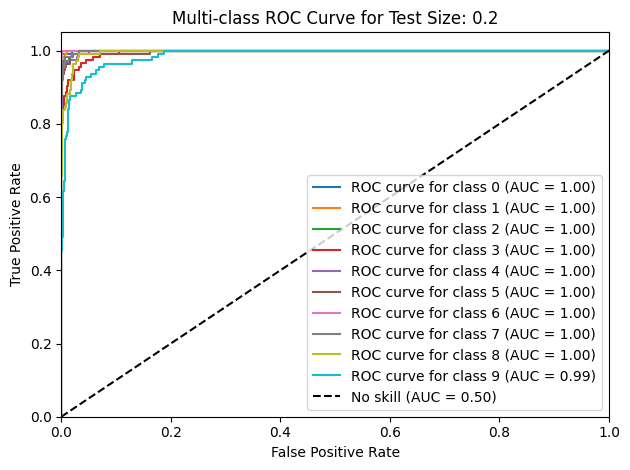

--------------------------------------------------

Running RandomForestClassifier with Test Size 0.3...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9501779359430605
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       166
           1       0.94      0.95      0.94       171
           2       0.98      0.99      0.98       167
           3       0.94      0.92      0.93       172
           4       0.96      0.95      0.96       170
           5       0.94      0.89      0.92       168
           6       0.98      1.00      0.99       167
           7       0.95      0.99      0.97       170
           8       0.96      0.93      0.94       166
           9       0.87      0.90      0.88       169

    accuracy                           0.95      1686
   macro avg       0.95      0.95      0.95      1686
weighted avg       0.95      0.95      0.95      1686

Plotting Confusion Matrix...


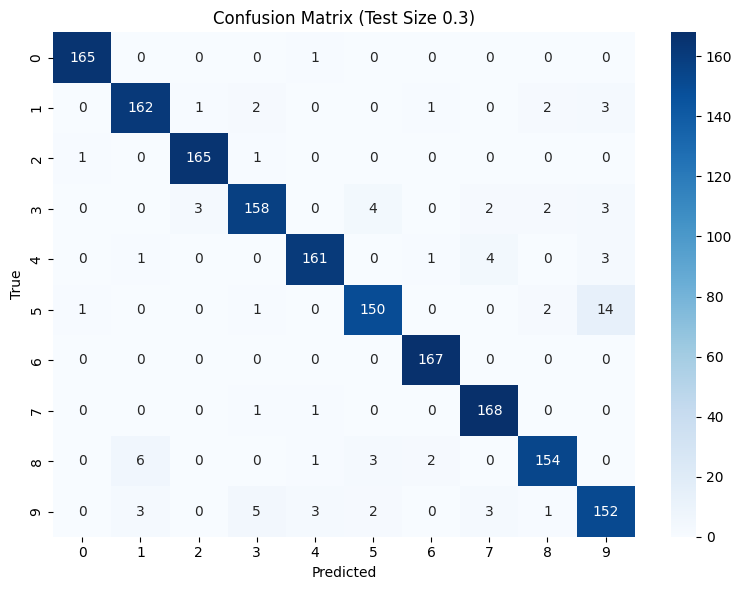

Plotting ROC-AUC...


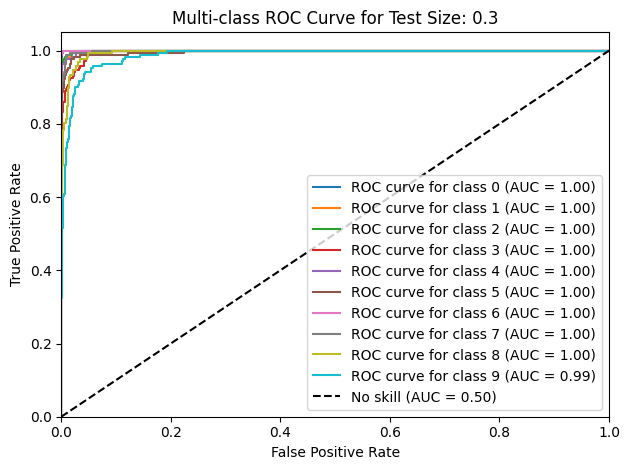

--------------------------------------------------

Running RandomForestClassifier with Test Size 0.4...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9386120996441281
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       222
           1       0.93      0.95      0.94       228
           2       0.95      0.95      0.95       223
           3       0.90      0.92      0.91       229
           4       0.97      0.94      0.96       227
           5       0.97      0.91      0.94       223
           6       0.97      1.00      0.98       223
           7       0.92      0.97      0.95       226
           8       0.95      0.88      0.91       222
           9       0.85      0.88      0.86       225

    accuracy                           0.94      2248
   macro avg       0.94      0.94      0.94      2248
weighted avg       0.94      0.94      0.94      2248

Plotting Confusion Matrix...


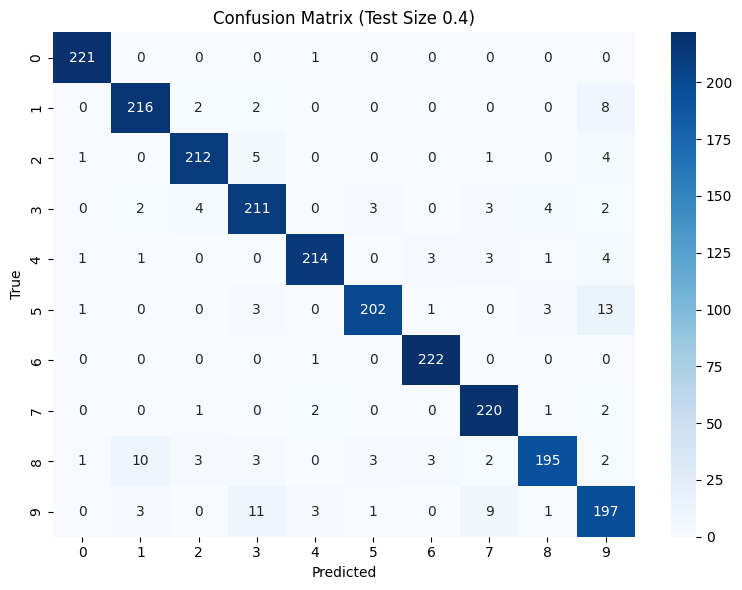

Plotting ROC-AUC...


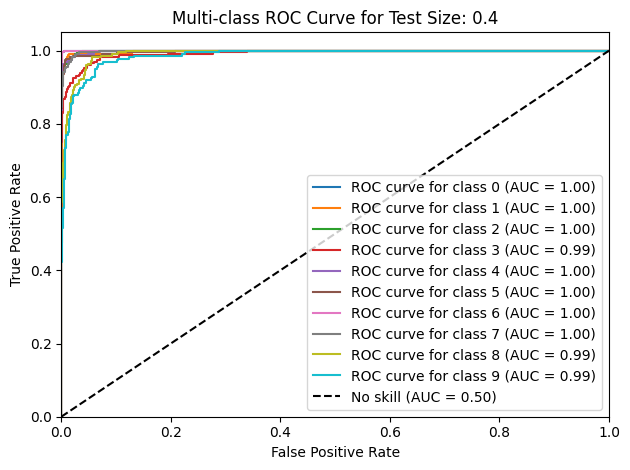

--------------------------------------------------

Running RandomForestClassifier with Test Size 0.5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9309608540925267
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       277
           1       0.94      0.92      0.93       286
           2       0.93      0.95      0.94       278
           3       0.90      0.90      0.90       286
           4       0.94      0.94      0.94       284
           5       0.96      0.91      0.94       279
           6       0.97      0.99      0.98       279
           7       0.93      0.97      0.95       283
           8       0.92      0.88      0.90       277
           9       0.85      0.85      0.85       281

    accuracy                           0.93      2810
   macro avg       0.93      0.93      0.93      2810
weighted avg       0.93      0.93      0.93      2810

Plotting Confusion Matrix...


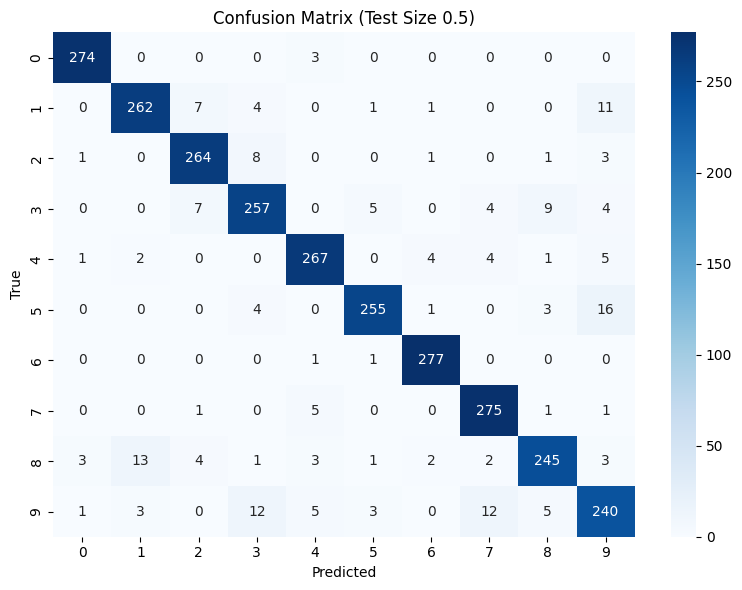

Plotting ROC-AUC...


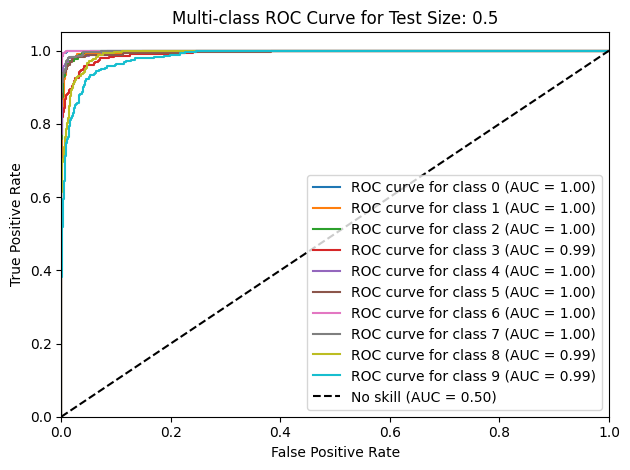

--------------------------------------------------

Plotting Accuracy Bar Graph Across All Test Sizes...


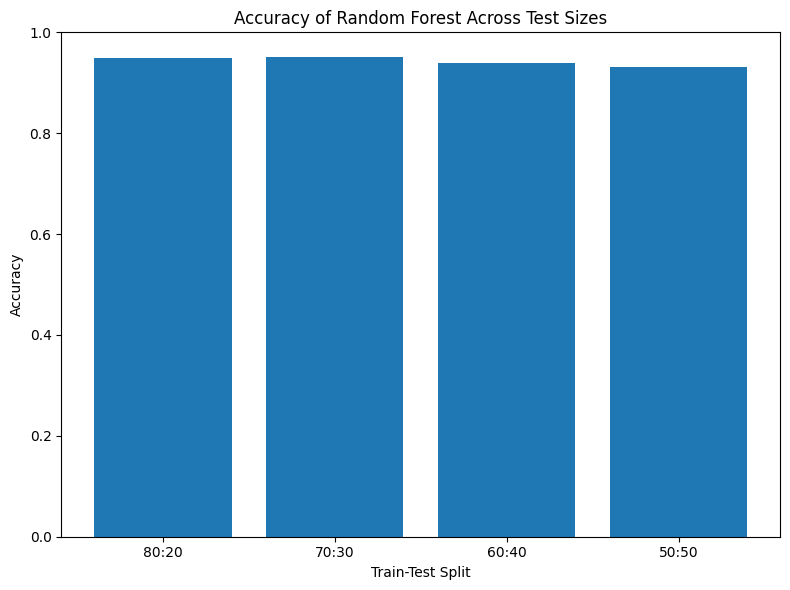

In [33]:
random_forest_classifier(
    X=digit_features_scaled,
    Y=digit_targets,  # or wine_targets.values.ravel()
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    n_estimators=100,
    max_depth=5,
    random_state=2
)

## SVC Classifier with PCA

Running SVC with kernel 'linear' and test size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: linear, Test Size: 0.2
Accuracy: 0.8434163701067615
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       0.79      0.94      0.86       101
           2       0.91      0.88      0.90       118
           3       0.83      0.86      0.85       108
           4       0.94      0.89      0.91       120
           5       0.67      0.70      0.69       105
           6       0.97      0.97      0.97       118
           7       0.89      0.88      0.89       112
           8       0.67      0.55      0.61       107
           9       0.75      0.74      0.74       125

    accuracy                           0.84      1124
   macro avg       0.84      0.84      0.84      1124
weighted avg       0.84      0.84      0.84      1124

----------------------------------------------------------------------------------------------
Running SVC with kernel 'linear' and test size 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: linear, Test Size: 0.3
Accuracy: 0.8374851720047449
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       0.80      0.93      0.86       164
           2       0.92      0.89      0.90       179
           3       0.81      0.89      0.85       167
           4       0.92      0.89      0.91       172
           5       0.70      0.70      0.70       164
           6       0.97      0.97      0.97       168
           7       0.88      0.87      0.88       159
           8       0.62      0.51      0.56       164
           9       0.76      0.74      0.75       190

    accuracy                           0.84      1686
   macro avg       0.83      0.84      0.84      1686
weighted avg       0.83      0.84      0.83      1686

----------------------------------------------------------------------------------------------
Running SVC with kernel 'linear' and test size 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: linear, Test Size: 0.4
Accuracy: 0.8403024911032029
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       218
           1       0.82      0.93      0.88       230
           2       0.90      0.86      0.88       231
           3       0.82      0.89      0.85       223
           4       0.90      0.90      0.90       226
           5       0.68      0.71      0.69       218
           6       0.96      0.97      0.97       230
           7       0.89      0.90      0.90       203
           8       0.69      0.53      0.60       228
           9       0.76      0.75      0.75       241

    accuracy                           0.84      2248
   macro avg       0.84      0.84      0.84      2248
weighted avg       0.84      0.84      0.84      2248

----------------------------------------------------------------------------------------------
Running SVC with kernel 'linear' and test size 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: linear, Test Size: 0.5
Accuracy: 0.8277580071174377
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       281
           1       0.83      0.91      0.87       283
           2       0.92      0.88      0.90       283
           3       0.81      0.86      0.84       273
           4       0.92      0.92      0.92       289
           5       0.67      0.65      0.66       280
           6       0.95      0.97      0.96       293
           7       0.83      0.89      0.86       251
           8       0.65      0.49      0.56       284
           9       0.69      0.74      0.72       293

    accuracy                           0.83      2810
   macro avg       0.82      0.83      0.82      2810
weighted avg       0.82      0.83      0.82      2810

----------------------------------------------------------------------------------------------

Accuracy bargraph for different testSizes 



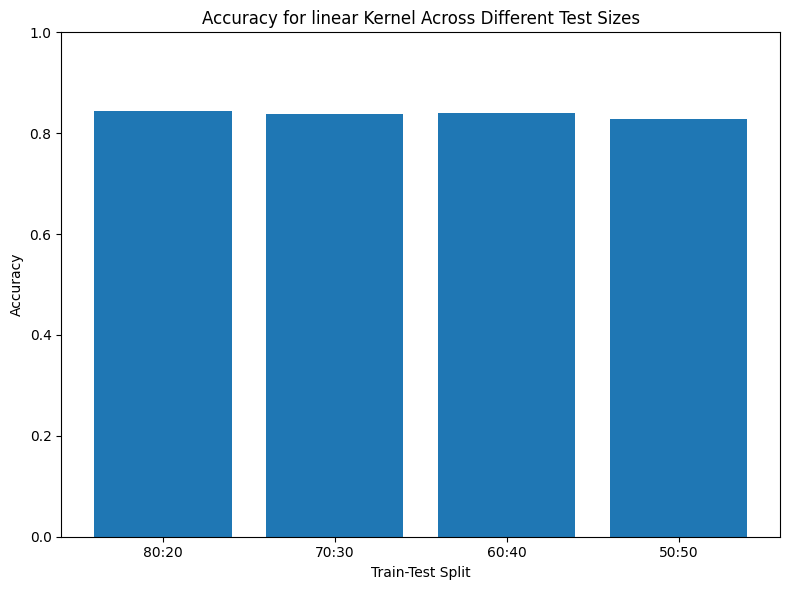

Running SVC with kernel 'poly' and test size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: poly, Test Size: 0.2
Accuracy: 0.8514234875444839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.90      0.94      0.92       101
           2       0.96      0.88      0.92       118
           3       0.94      0.85      0.89       108
           4       0.97      0.93      0.94       120
           5       0.66      0.47      0.55       105
           6       0.98      0.97      0.98       118
           7       0.89      0.87      0.88       112
           8       0.51      0.82      0.63       107
           9       0.84      0.78      0.81       125

    accuracy                           0.85      1124
   macro avg       0.86      0.85      0.85      1124
weighted avg       0.87      0.85      0.85      1124

----------------------------------------------------------------------------------------------
Running SVC with kernel 'poly' and test size 0.3.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: poly, Test Size: 0.3
Accuracy: 0.8404507710557533
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.87      0.92      0.90       164
           2       0.97      0.85      0.91       179
           3       0.91      0.86      0.88       167
           4       0.96      0.91      0.94       172
           5       0.69      0.48      0.56       164
           6       0.97      0.96      0.96       168
           7       0.90      0.87      0.89       159
           8       0.49      0.80      0.61       164
           9       0.85      0.79      0.82       190

    accuracy                           0.84      1686
   macro avg       0.86      0.84      0.84      1686
weighted avg       0.86      0.84      0.84      1686

----------------------------------------------------------------------------------------------
Running SVC with kernel 'poly' and test size 0.4.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: poly, Test Size: 0.4
Accuracy: 0.8429715302491103
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       218
           1       0.91      0.92      0.92       230
           2       0.97      0.82      0.89       231
           3       0.93      0.85      0.89       223
           4       0.95      0.91      0.93       226
           5       0.70      0.50      0.58       218
           6       0.96      0.97      0.96       230
           7       0.89      0.84      0.87       203
           8       0.52      0.86      0.65       228
           9       0.81      0.79      0.80       241

    accuracy                           0.84      2248
   macro avg       0.86      0.84      0.85      2248
weighted avg       0.86      0.84      0.85      2248

----------------------------------------------------------------------------------------------
Running SVC with kernel 'poly' and test size 0.5.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: poly, Test Size: 0.5
Accuracy: 0.8323843416370107
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       281
           1       0.91      0.93      0.92       283
           2       0.98      0.80      0.88       283
           3       0.92      0.85      0.89       273
           4       0.95      0.91      0.93       289
           5       0.73      0.45      0.56       280
           6       0.95      0.96      0.95       293
           7       0.85      0.86      0.85       251
           8       0.50      0.85      0.63       284
           9       0.79      0.76      0.77       293

    accuracy                           0.83      2810
   macro avg       0.86      0.83      0.84      2810
weighted avg       0.86      0.83      0.84      2810

----------------------------------------------------------------------------------------------

Accuracy bargraph for different testSizes 



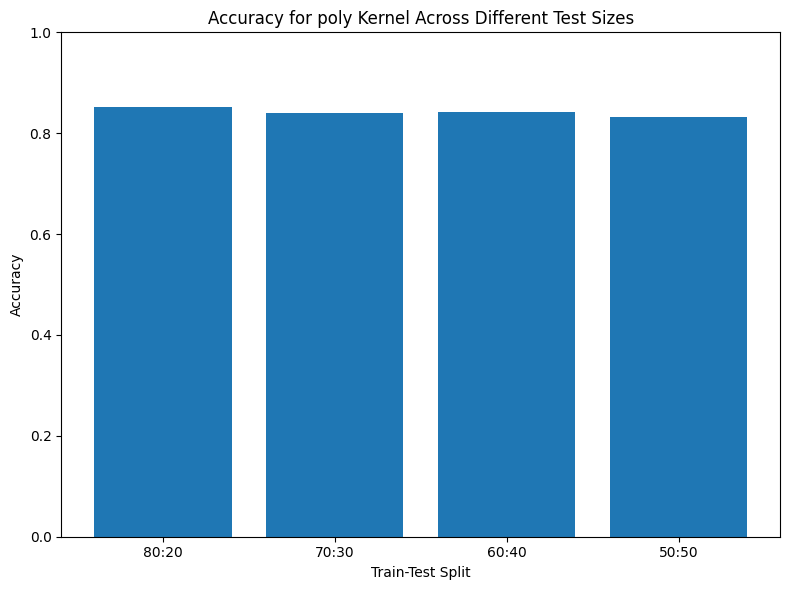

Running SVC with kernel 'rbf' and test size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: rbf, Test Size: 0.2
Accuracy: 0.8798932384341637
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       110
           1       0.89      0.95      0.92       101
           2       0.97      0.94      0.95       118
           3       0.90      0.87      0.88       108
           4       0.97      0.93      0.95       120
           5       0.75      0.76      0.75       105
           6       0.97      0.98      0.97       118
           7       0.84      0.88      0.86       112
           8       0.73      0.67      0.70       107
           9       0.80      0.80      0.80       125

    accuracy                           0.88      1124
   macro avg       0.88      0.88      0.88      1124
weighted avg       0.88      0.88      0.88      1124

----------------------------------------------------------------------------------------------
Running SVC with kernel 'rbf' and test size 0.3...

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: rbf, Test Size: 0.3
Accuracy: 0.8695136417556346
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       159
           1       0.87      0.94      0.90       164
           2       0.96      0.92      0.94       179
           3       0.88      0.89      0.88       167
           4       0.96      0.93      0.95       172
           5       0.71      0.76      0.74       164
           6       0.96      0.98      0.97       168
           7       0.85      0.87      0.86       159
           8       0.67      0.62      0.64       164
           9       0.84      0.80      0.82       190

    accuracy                           0.87      1686
   macro avg       0.87      0.87      0.87      1686
weighted avg       0.87      0.87      0.87      1686

----------------------------------------------------------------------------------------------
Running SVC with kernel 'rbf' and test size 0.4...

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: rbf, Test Size: 0.4
Accuracy: 0.8727758007117438
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       218
           1       0.90      0.96      0.93       230
           2       0.97      0.89      0.93       231
           3       0.89      0.88      0.89       223
           4       0.94      0.92      0.93       226
           5       0.73      0.74      0.74       218
           6       0.96      0.97      0.97       230
           7       0.86      0.90      0.88       203
           8       0.70      0.66      0.68       228
           9       0.80      0.83      0.82       241

    accuracy                           0.87      2248
   macro avg       0.87      0.87      0.87      2248
weighted avg       0.87      0.87      0.87      2248

----------------------------------------------------------------------------------------------
Running SVC with kernel 'rbf' and test size 0.5...

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: rbf, Test Size: 0.5
Accuracy: 0.8601423487544484
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       281
           1       0.88      0.95      0.92       283
           2       0.97      0.89      0.93       283
           3       0.88      0.88      0.88       273
           4       0.94      0.92      0.93       289
           5       0.71      0.72      0.72       280
           6       0.96      0.97      0.96       293
           7       0.80      0.90      0.85       251
           8       0.68      0.61      0.65       284
           9       0.78      0.78      0.78       293

    accuracy                           0.86      2810
   macro avg       0.86      0.86      0.86      2810
weighted avg       0.86      0.86      0.86      2810

----------------------------------------------------------------------------------------------

Accuracy bargraph for different testSizes 



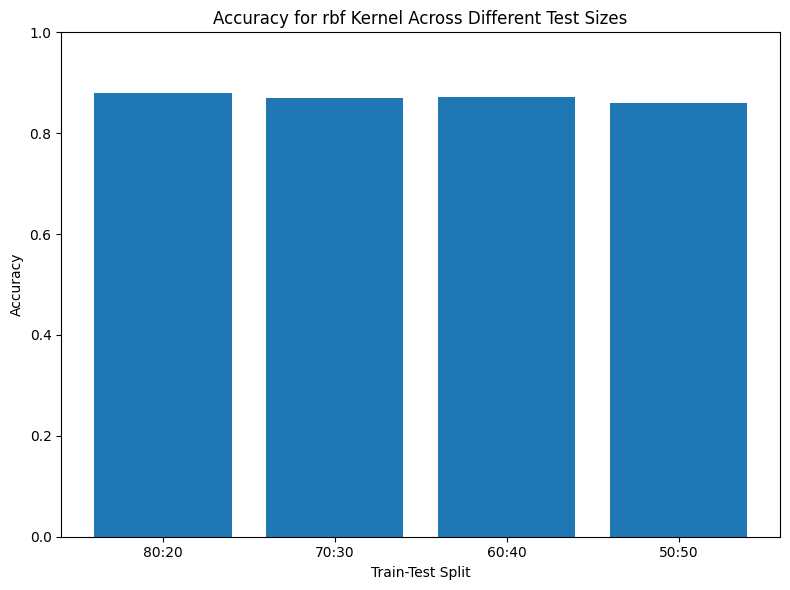

Running SVC with kernel 'sigmoid' and test size 0.2...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: sigmoid, Test Size: 0.2
Accuracy: 0.6423487544483986
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.50      0.70      0.58       101
           2       0.61      0.73      0.67       118
           3       0.74      0.76      0.75       108
           4       0.56      0.74      0.64       120
           5       0.57      0.45      0.50       105
           6       0.97      0.77      0.86       118
           7       0.59      0.72      0.65       112
           8       0.36      0.21      0.26       107
           9       0.64      0.47      0.54       125

    accuracy                           0.64      1124
   macro avg       0.64      0.64      0.63      1124
weighted avg       0.65      0.64      0.64      1124

----------------------------------------------------------------------------------------------
Running SVC with kernel 'sigmoid' and test siz

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: sigmoid, Test Size: 0.3
Accuracy: 0.6340450771055753
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       159
           1       0.54      0.68      0.60       164
           2       0.61      0.69      0.65       179
           3       0.75      0.72      0.74       167
           4       0.53      0.73      0.61       172
           5       0.57      0.42      0.48       164
           6       0.94      0.83      0.88       168
           7       0.58      0.73      0.65       159
           8       0.34      0.20      0.25       164
           9       0.59      0.48      0.53       190

    accuracy                           0.63      1686
   macro avg       0.63      0.64      0.63      1686
weighted avg       0.63      0.63      0.63      1686

----------------------------------------------------------------------------------------------
Running SVC with kernel 'sigmoid' and test siz

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: sigmoid, Test Size: 0.4
Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       218
           1       0.56      0.71      0.62       230
           2       0.59      0.69      0.64       231
           3       0.77      0.76      0.76       223
           4       0.55      0.68      0.61       226
           5       0.55      0.39      0.45       218
           6       0.95      0.79      0.86       230
           7       0.51      0.75      0.61       203
           8       0.28      0.14      0.18       228
           9       0.55      0.50      0.52       241

    accuracy                           0.62      2248
   macro avg       0.62      0.63      0.61      2248
weighted avg       0.62      0.62      0.61      2248

----------------------------------------------------------------------------------------------
Running SVC with kernel 'sigmoid' and test size 0.5...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


running for pca
Kernel: sigmoid, Test Size: 0.5
Accuracy: 0.6252669039145907
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       281
           1       0.53      0.73      0.62       283
           2       0.56      0.72      0.63       283
           3       0.74      0.67      0.70       273
           4       0.63      0.62      0.62       289
           5       0.52      0.33      0.40       280
           6       0.93      0.77      0.84       293
           7       0.52      0.79      0.63       251
           8       0.40      0.21      0.28       284
           9       0.55      0.52      0.53       293

    accuracy                           0.63      2810
   macro avg       0.63      0.63      0.61      2810
weighted avg       0.63      0.63      0.61      2810

----------------------------------------------------------------------------------------------

Accuracy bargraph for different testSizes 



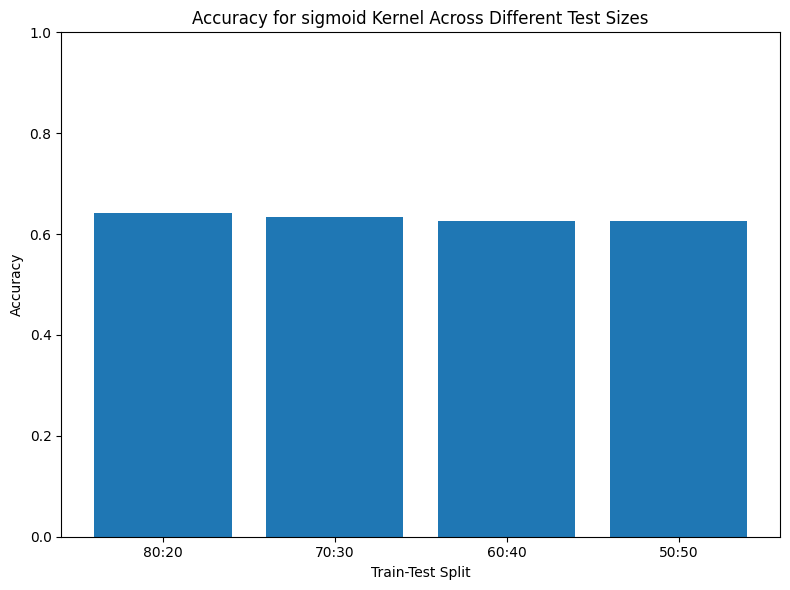

In [34]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
test_sizes = [0.2, 0.3, 0.4, 0.5]

# Call the function to run SVC classifier for each kernel and test size
svc_classifier_with_pca(X=digit_features_scaled, Y=digit_targets, kernels=kernels, test_sizes=test_sizes)

## MLP Classifier with PCA


Running MLPClassifier with Test Size 0.2 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.854982206405694
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       111
           1       0.91      0.93      0.92       114
           2       0.98      0.93      0.95       111
           3       0.82      0.89      0.85       114
           4       0.95      0.93      0.94       114
           5       0.67      0.64      0.65       112
           6       0.97      0.98      0.98       112
           7       0.85      0.91      0.88       113
           8       0.65      0.64      0.64       111
           9       0.76      0.70      0.73       112

    accuracy                           0.85      1124
   macro avg       0.85      0.85      0.85      1124
weighted avg       0.85      0.85      0.85      1124


Running MLPClassifier with Test Size 0.3 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8505338078291815
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       166
           1       0.90      0.91      0.90       171
           2       0.97      0.90      0.93       167
           3       0.83      0.88      0.85       172
           4       0.96      0.93      0.95       170
           5       0.66      0.66      0.66       168
           6       0.96      0.98      0.97       167
           7       0.83      0.91      0.87       170
           8       0.63      0.62      0.62       166
           9       0.78      0.74      0.76       169

    accuracy                           0.85      1686
   macro avg       0.85      0.85      0.85      1686
weighted avg       0.85      0.85      0.85      1686


Running MLPClassifier with Test Size 0.4 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8456405693950177
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       222
           1       0.90      0.90      0.90       228
           2       0.93      0.89      0.91       223
           3       0.83      0.89      0.86       229
           4       0.94      0.93      0.94       227
           5       0.65      0.68      0.66       223
           6       0.97      0.98      0.97       223
           7       0.84      0.93      0.88       226
           8       0.60      0.54      0.57       222
           9       0.79      0.75      0.77       225

    accuracy                           0.85      2248
   macro avg       0.84      0.85      0.84      2248
weighted avg       0.84      0.85      0.84      2248


Running MLPClassifier with Test Size 0.5 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8469750889679716
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       277
           1       0.90      0.93      0.92       286
           2       0.89      0.86      0.87       278
           3       0.80      0.90      0.85       286
           4       0.95      0.92      0.93       284
           5       0.71      0.65      0.68       279
           6       0.97      0.99      0.98       279
           7       0.84      0.93      0.89       283
           8       0.61      0.58      0.60       277
           9       0.79      0.73      0.76       281

    accuracy                           0.85      2810
   macro avg       0.84      0.85      0.84      2810
weighted avg       0.85      0.85      0.85      2810


Plotting Accuracy Bar Graph Across All Test Sizes...


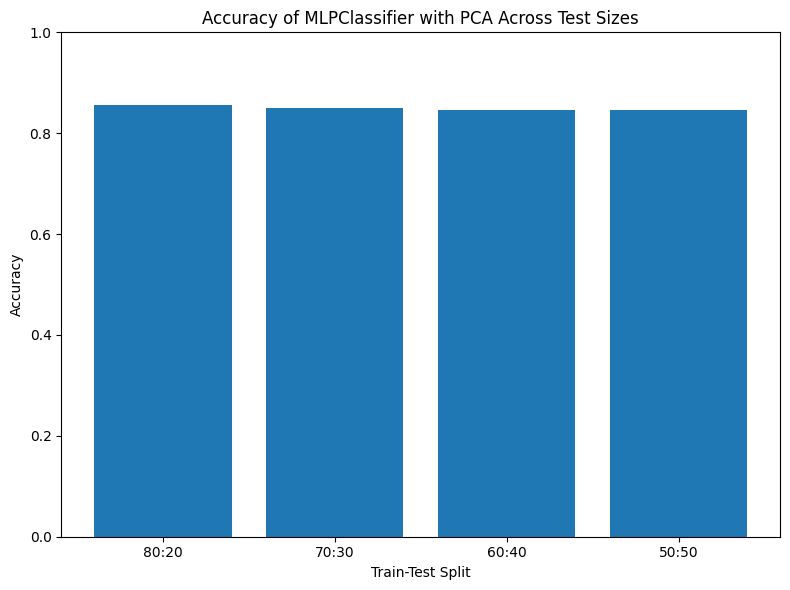

In [35]:
mlp_classifier_with_pca(
    X=digit_features_scaled,
    Y=digit_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    momentum=0.95,
    max_iter=1000,
    learning_rate='adaptive',
    n_components=5
)

## Random Forest Classifier with PCA


Running Random ForestClassifier with Test Size 0.2 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7829181494661922
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       111
           1       0.82      0.93      0.87       114
           2       0.85      0.87      0.86       111
           3       0.78      0.75      0.77       114
           4       0.94      0.88      0.91       114
           5       0.70      0.28      0.40       112
           6       0.97      0.93      0.95       112
           7       0.77      0.91      0.84       113
           8       0.45      0.60      0.51       111
           9       0.67      0.71      0.69       112

    accuracy                           0.78      1124
   macro avg       0.79      0.78      0.78      1124
weighted avg       0.79      0.78      0.78      1124


Running Random ForestClassifier with Test Size 0.3 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7740213523131673
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       166
           1       0.80      0.92      0.86       171
           2       0.86      0.85      0.86       167
           3       0.76      0.72      0.74       172
           4       0.95      0.86      0.90       170
           5       0.74      0.27      0.40       168
           6       0.96      0.95      0.96       167
           7       0.75      0.90      0.82       170
           8       0.46      0.61      0.52       166
           9       0.63      0.69      0.66       169

    accuracy                           0.77      1686
   macro avg       0.79      0.77      0.77      1686
weighted avg       0.79      0.77      0.77      1686


Running Random ForestClassifier with Test Size 0.4 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7864768683274022
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       222
           1       0.84      0.91      0.87       228
           2       0.86      0.83      0.85       223
           3       0.81      0.74      0.77       229
           4       0.92      0.87      0.90       227
           5       0.80      0.35      0.48       223
           6       0.95      0.95      0.95       223
           7       0.74      0.90      0.81       226
           8       0.47      0.65      0.54       222
           9       0.66      0.71      0.69       225

    accuracy                           0.79      2248
   macro avg       0.80      0.79      0.78      2248
weighted avg       0.80      0.79      0.78      2248


Running Random ForestClassifier with Test Size 0.5 and PCA n_components=5...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.79288256227758
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       277
           1       0.80      0.93      0.86       286
           2       0.88      0.79      0.83       278
           3       0.81      0.79      0.80       286
           4       0.95      0.83      0.89       284
           5       0.64      0.47      0.54       279
           6       0.94      0.95      0.94       279
           7       0.77      0.86      0.81       283
           8       0.54      0.61      0.58       277
           9       0.68      0.75      0.71       281

    accuracy                           0.79      2810
   macro avg       0.80      0.79      0.79      2810
weighted avg       0.80      0.79      0.79      2810


Plotting Accuracy Bar Graph Across All Test Sizes...


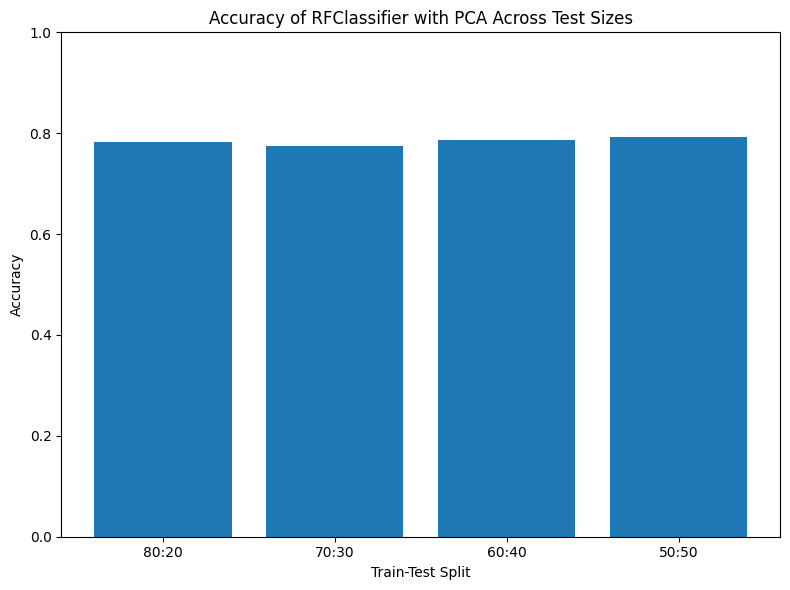

In [36]:
random_forest_classifier_with_pca(
    X=digit_features_scaled,
    Y=digit_targets,
    test_sizes=[0.2, 0.3, 0.4, 0.5],
    n_estimators=100,
    max_depth=5,
    random_state=2
)